# Information for groups working on projects 7 (Future Arctic sea ice) and 8 (the Atlantic Multidecadal Oscillation)

The aim of this notebook is to give you some information that might be useful for starting your projects: 

- Part A provides you with a quick introduction to the CMIP6 project and ensemble modelling. It also contains a list of links that provide details about the data that are available to you in the CMIP6 catalogue. You can use this to help you to decide what data you want to analyse for your project.
- Part B provides some examples of how to plot data on maps easily, by combining xarray with Cartopy

## A. Data sources and information about CMIP6

### 1. Introduction
Projects 7 & 8 require you to analyse model output from the CMIP6 project. It is possible to access these data a number of ways, including via the cloud, since Google host a part of these data via their Public Datasets programme (https://cloud.google.com/blog/products/data-analytics/new-climate-model-data-now-google-public-datasets). For your projects, this is how you will access the CMIP6 data. As you saw last week in class, this method means that you will be able to analyse the data directly in Colab without downloading anything to your machine.

### 2. What is ensemble modelling and why do we do it?
CMIP6 uses an *ensemble modelling strategy*. What does this mean?

In the context of CMIP6, an *ensemble* of model simulations is a collection of simulations that have been created using exactly the same configuration for all aspects of each simulation, with the exception of the initial conditions. These very small differences in the initial state can lead to much larger differences in the forecast over time, as popularised in the so-called "butterfly effect".

We use ensemble modelling to help us understand the probability of the events simulated by the model occurring. For example, imagine that we use an ensemble of 5 simulations to try to forecast next week's weather, and all 5 simulations predict that it will rain in Brest. In this case, we will be more likely to believe that it will rain next week than if our results had been that 2 of our simulations told us that it would rain, 2 told us that it would be sunny and 1 told us that it would snow.

The aim of the ensemble approach in climate modelling (as in CMIP6) is the same as in the weather forecasting case: it is an attempt to quantify how much we believe the predictions of the future climate.

### 3. What is CMIP6?
CMIP = Coupled Model Intercomparison Project (wikipedia page: https://en.wikipedia.org/wiki/Coupled_Model_Intercomparison_Project)

The CMIP programme aims to improve our knowledge of climate change. It began in 1995, and has already been through 5 "phases". Each "phase" corresponds to a coordinated effort to collect together a number of climate simulations created by research centres around the world. These simulations are then made freely available for anybody to download and analyse. Phase 6 is now underway: the data that you will be analysing are thus only recently available, and are likely to be used in research studies for about the next ten years or so.

A number of experiments are defined at each phase. These often consist of "historical" experiments, which simulate the climate over the past decade, and a number of future experiments, which simulate the future climate in response to certain prescribed greenhouse gas concentration scenarios, which should represent the response to possible future decisions made by society. (If you are interested in reading more about these, this article provides a nice introduction: https://www.carbonbrief.org/explainer-how-shared-socioeconomic-pathways-explore-future-climate-change)

### 4. What data are available for your projects?
The CMIP6 catalogue contains a lot of data: the entire archive may eventually comprise 20PB of data when all the simulations have been completed! Not all available data are stored in the Cloud, so you will need to check to see what is available when deciding which model(s) and scenario(s) you want to analyse.

The Pangeo community have written some useful summaries that describe:

- the data available in the Cloud: https://docs.google.com/document/d/1yUx6jr9EdedCOLd--CPdTfGDwEwzPpCF6p1jRmqx-0Q/edit
- a list of the models available: https://docs.google.com/spreadsheets/d/13DHeTEH_8G08vxTMX1Fs-WbAA6SamBjDdh0fextdcGE/edit#gid=165882553
- a list of the variables available: https://docs.google.com/spreadsheets/d/1UUtoz6Ofyjlpx5LdqhKcwHFz2SGoTQV2_yekHyMfL9Y/edit#gid=1221485271

They have also produced an example notebook that shows how to load in air temperature. You can run it directly in Colab: https://colab.research.google.com/drive/19iEVxE_9QoTeg4st7MmucHJUmO93NXHp

Their notebook is an excellent introduction: it should provide you with everything that you need to get started loading the data. I recommend that you look at it!

## B. Using xarray with Cartopy

So far we have talked a lot about accessing and analysing data, but didn't talk much about how to make figures. In the geosciences, often we want to make maps. Unfortunately, sometimes this can be more difficult than we would like! Model grids are often irregular, and it can be difficult to plot data in the polar regions, where all longitudes get closer and closer together, and finally converge to a single point.

The Pangeo notebook shows an example of loading CMIP6 data using xarray. One of the really nice features of xarray is that it integrates with the plotting library Cartopy (https://scitools.org.uk/cartopy/docs/latest/) to enable us to change map projections and easily transform our data. We'll look at an example for the Arctic below.

Let's load in the sea surface height for the IPSL model in the Shared Socioeconomic Pathway 2 scenario:

In [ ]:

# first we have to install some libraries in Colab
!pip install zarr
!pip install gcsfs
# colab requires a specific installation of cartopy
!apt-get -qq install python-cartopy python3-cartopy;
!pip uninstall -y shapely;    # cartopy and shapely don't work well together at the moment...
!pip install shapely --no-binary shapely; # so reinstall a version that will work

     |████████████████████████████████| 133kB 5.5MB/s 
     |████████████████████████████████| 5.8MB 8.8MB/s 
  Created wheel for asciitree: filename=asciitree-0.3.3-cp36-none-any.whl size=5038 sha256=cb8abe574d5db39944dfccf1f48f4f8d232ed88bdae906cf8e5f174287348076
  Stored in directory: /root/.cache/pip/wheels/1d/d9/58/9808b306744df0208fccc640d3d9952a5bc7468502d42897d5
Successfully built asciitree
     |████████████████████████████████| 102kB 3.8MB/s 
     |████████████████████████████████| 1.3MB 7.4MB/s 
     |████████████████████████████████| 143kB 15.6MB/s 
     |████████████████████████████████| 296kB 13.4MB/s 
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3163 sha256=d7ee14dde15d4d4c4dc6ec811ebd696718f4345329512074b598aaad3ae47e18
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built idna-ssl
Selecting previously unselected package python-pkg-resources.
(Reading database ... 146

In [ ]:
%%bash
apt-get install libgeos-3* libgeos-dev
pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists...
Building dependency tree...
Reading state information...
libgeos-3.6.2 is already the newest version (3.6.2-1build2).
libgeos-3.6.2 set to manually installed.
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 12 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (204 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 146956 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1build2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp36-cp36m-linux_x86_64.whl size=121

In [ ]:
# set up our libraries
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import zarr
import gcsfs

# set up cartopy
import cartopy.crs as ccrs
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

# notebook display options
xr.set_options(display_style='html')
%matplotlib inline
%pylab inline

from mpl_toolkits.basemap import Basemap
import sklearn
from scipy.stats.mstats import zscore
import warnings
warnings.filterwarnings("ignore") # disable warnings
pylab.rcParams['figure.figsize']=(20,20) # graph size

Populating the interactive namespace from numpy and matplotlib


# DataSet Manipulation & First Data about Siconc

Open all variables siconc from table SImon. The experiment is 'historical', that mean data was gathered along the past years.

In [ ]:
# and load in the SICONC data
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df_siconc = df.query(" table_id == 'SImon' & variable_id == 'siconc' & experiment_id == 'historical'")
df_siconc

activity_id institution_id  ... dcpp_init_year   version
15079         CMIP        AS-RCEC  ...            NaN  20200218
15763         CMIP            AWI  ...            NaN  20200212
16496         CMIP            BCC  ...            NaN  20200218
16609         CMIP            BCC  ...            NaN  20200218
16710         CMIP            BCC  ...            NaN  20200218
...            ...            ...  ...            ...       ...
114731        CMIP          NUIST  ...            NaN  20190704
115105        CMIP            SNU  ...            NaN  20190323
115423        CMIP            THU  ...            NaN  20200420
115474        CMIP            THU  ...            NaN  20200420
115517        CMIP            THU  ...            NaN  20200420

[490 rows x 11 columns]

In [ ]:
# and load in the SICONC data
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df_siconc = df.query(" table_id == 'SImon' & variable_id == 'siconc' & experiment_id == 'historical' & member_id == 'r1i1p1f1' & institution_id == 'IPSL'")
df_siconc

# setup the gcs access
gcs = gcsfs.GCSFileSystem(token='anon')

# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_siconc.zstore.values[-1]

# create a mapping interface to the store
mapper = gcs.get_mapper(zstore)

# open it using xarray and zarr
ds = xr.open_zarr(mapper, consolidated=True)
ds

<xarray.Dataset>
Dimensions:         (axis_nbounds: 2, nvertex: 4, time: 1980, x: 362, y: 332)
Coordinates:
    bounds_nav_lat  (y, x, nvertex) float32 dask.array<chunksize=(332, 362, 4), meta=np.ndarray>
    bounds_nav_lon  (y, x, nvertex) float32 dask.array<chunksize=(332, 362, 4), meta=np.ndarray>
    nav_lat         (y, x) float32 dask.array<chunksize=(332, 362), meta=np.ndarray>
    nav_lon         (y, x) float32 dask.array<chunksize=(332, 362), meta=np.ndarray>
  * time            (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
    time_bounds     (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1980, 2), meta=np.ndarray>
    type            |S255 ...
Dimensions without coordinates: axis_nbounds, nvertex, x, y
Data variables:
    area            (y, x) float32 dask.array<chunksize=(332, 362), meta=np.ndarray>
    siconc          (time, y, x) float32 dask.array<chunksize=(600, 332, 362), meta=np.ndarray>
Attributes:
    CMIP6_CV_version:       cv=6.2.3.5-2-g63b123e
    Conventions:            CF-1.7 CMIP-6.2
    EXPID:                  historical
    NCO:                    "4.6.0"
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  21914.0
    contact:                ipsl-cmip6@listes.ipsl.fr
    creation_date:          2018-07-11T07:36:12Z
    data_specs_version:     01.00.21
    description:            CMIP6 historical
    dr2xml_md5sum:          f1e40c1fc5d8281f865f72fbf4e38f9d
    dr2xml_version:         1.11
    experiment:             all-forcing simulation of the recent past
    experiment_id:          historical
    external_variables:     areacello
    forcing_index:          1
    frequency:              mon
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL-CM...
    grid:                   native ocean tri-polar grid with 105 k ocean cells
    grid_label:             gn
    history:                Sat Dec  1 12:13:24 2018: ncatted -O -a realizati...
    initialization_index:   1
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    institution_id:         IPSL
    license:                CMIP6 model data produced by IPSL is licensed und...
    mip_era:                CMIP6
    model_version:          6.1.5
    name:                   /ccc/work/cont003/gencmip6/p86caub/IGCM_OUT/IPSLC...
    nominal_resolution:     100 km
    parent_activity_id:     CMIP
    parent_experiment_id:   piControl
    parent_mip_era:         CMIP6
    parent_source_id:       IPSL-CM6A-LR
    parent_time_units:      days since 1850-01-01 00:00:00
    parent_variant_label:   r1i1p1f1
    physics_index:          1
    product:                model-output
    realization_index:      1
    realm:                  seaIce
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    source_id:              IPSL-CM6A-LR
    source_type:            AOGCM BGC
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               SImon
    title:                  IPSL-CM6A-LR model output prepared for CMIP6 / CM...
    tracking_id:            hdl:21.14100/7aedb752-12e5-4f9f-bf07-e6947579061d
    variable_id:            siconc
    variant_label:          r1i1p1f1
    status:                 2019-10-25;created;by nhn2@columbia.edu

It's very difficult to see what's going on in the Arctic with this projection. We'll manage this by using the Polar Stereographic projection, which has the North Pole in the middle of the figure, like this:

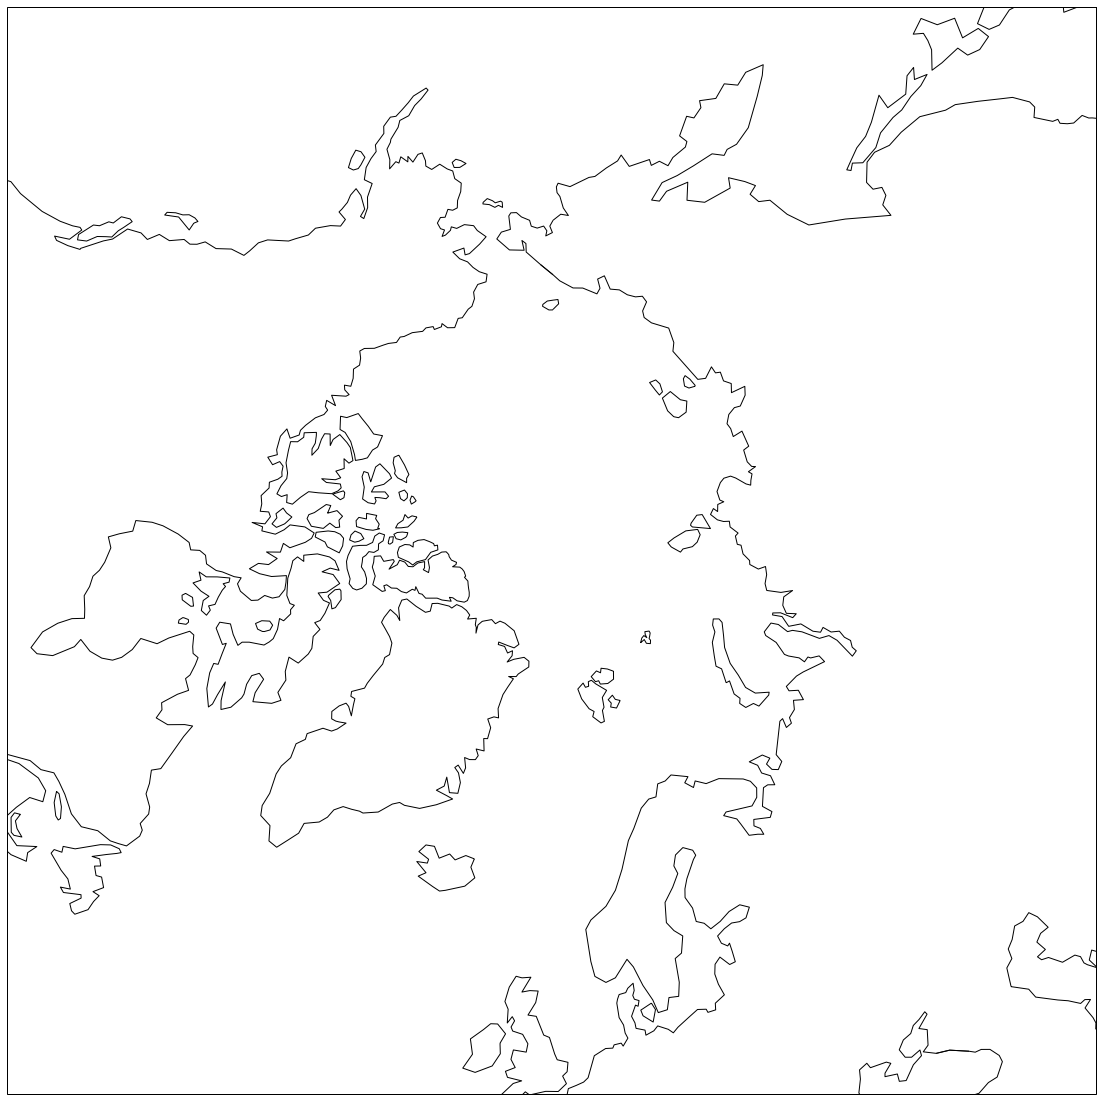

In [ ]:
fig = plt.figure()
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.set_extent([-180, 180, 50, 100], ccrs.PlateCarree())
ax.coastlines()

To plot time series of siconc, we use again plot_ts. We plot siconc and the rolling mean of siconc over 50 times.

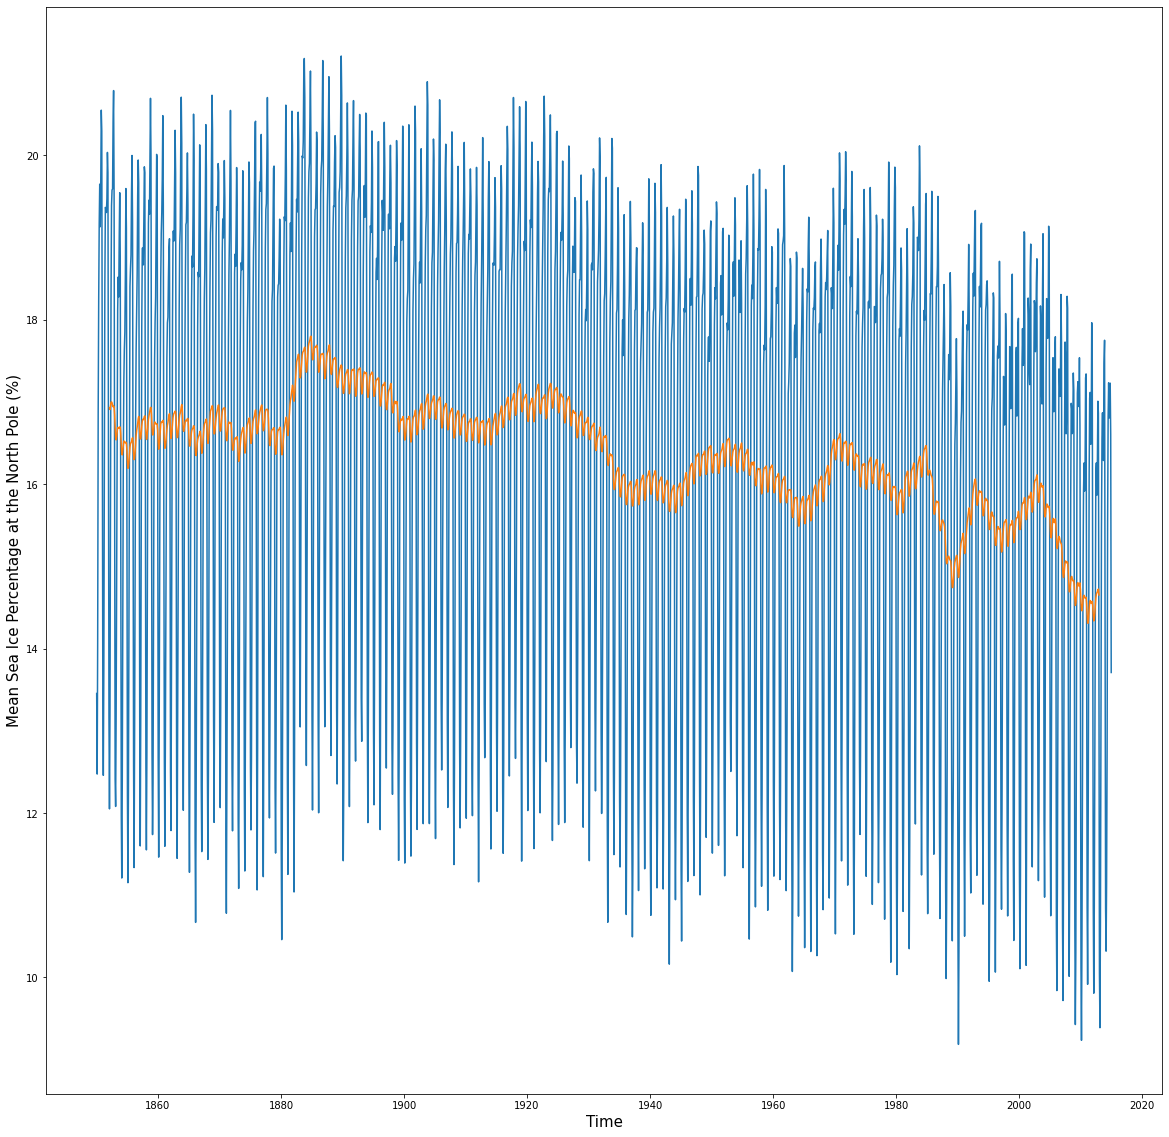

In [ ]:
# function to plot time series
def plot_ts(time,ts,line_type,var_name):

    # plot
    plot_date(time,ts,line_type)
    xlabel('Time',fontsize=15)
    ylabel(var_name,fontsize=15)

plot_ts(ds.time, ds.siconc.mean(['x', 'y']), '-', 'Mean Sea Ice Percentage at the North Pole (%)')
plot(ds.time, ds.siconc.mean(['x', 'y']).rolling(time=50, center=True).mean())

To be able to plot our data on this map, we also need to apply a transformation. We can just tell xarray to do this for us, by telling it the name of the transformation to apply:


*   Mean Siconc between 1850 and 2014



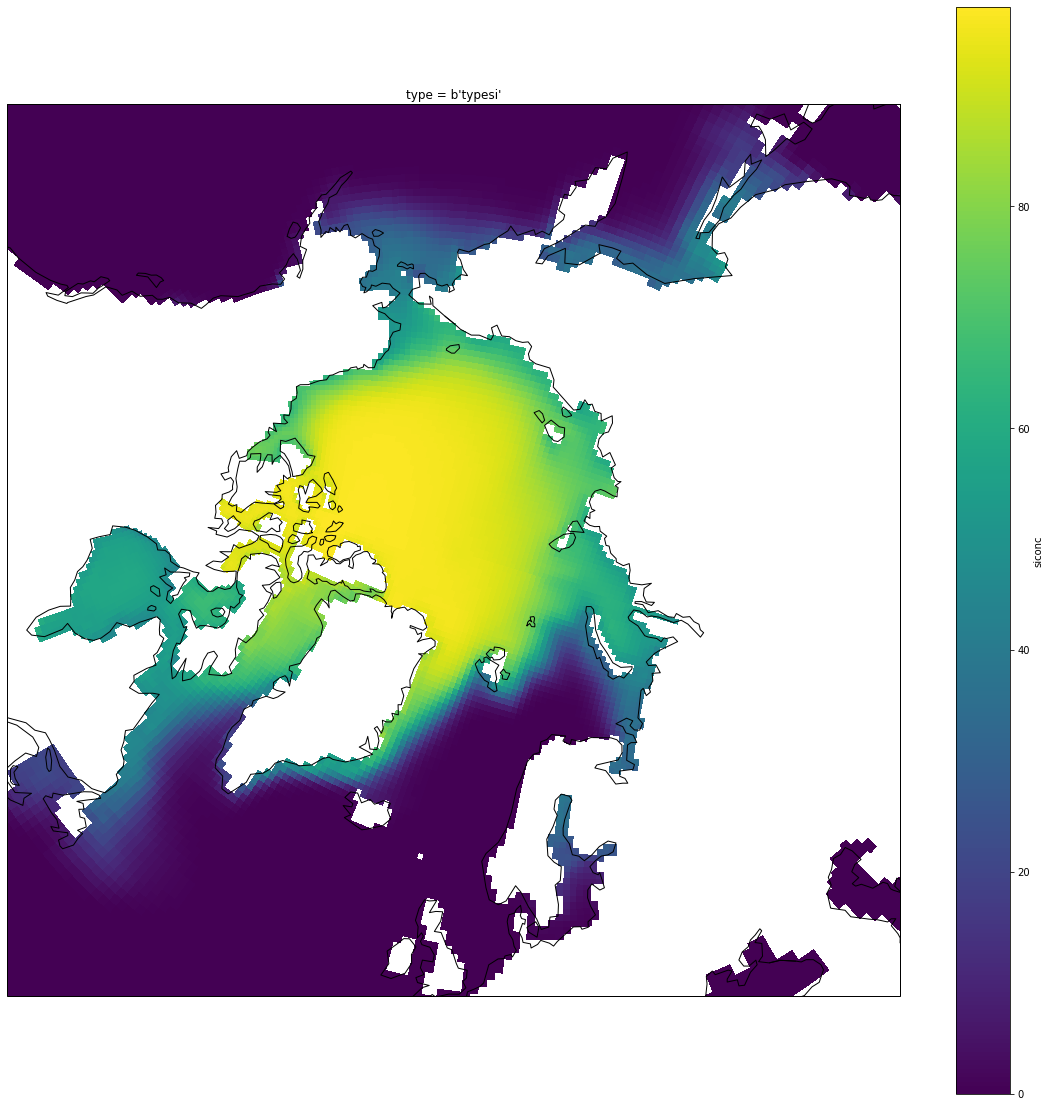

In [ ]:
# first we set up our axes with the projection that we want
ax = plt.axes(projection=ccrs.NorthPolarStereo());
# then we set the latitude limits on our figure (here, we include all longitudes
# (-180° -> 180°) and 55°N -> 90°N)
ax.set_extent([-180, 180, 50, 100], ccrs.PlateCarree())
# now we tell xarray to plot our data. We pass a number of extra parameters:
# transform=ccrs.PlateCarree() -> tells xarray how to transform the data
# x='nav_lon' -> tells xarray the name of the longitude variable
# y='nav_lat' -> tells xarray the name of the latitude variable
ds.siconc.mean(['time']).plot.pcolormesh(ax=ax,transform=ccrs.PlateCarree(),x='nav_lon', y='nav_lat', add_colorbar=True); 
# finally, we add the coastlines
ax.coastlines();



*   Siconc Map at Time: 1850-01-01







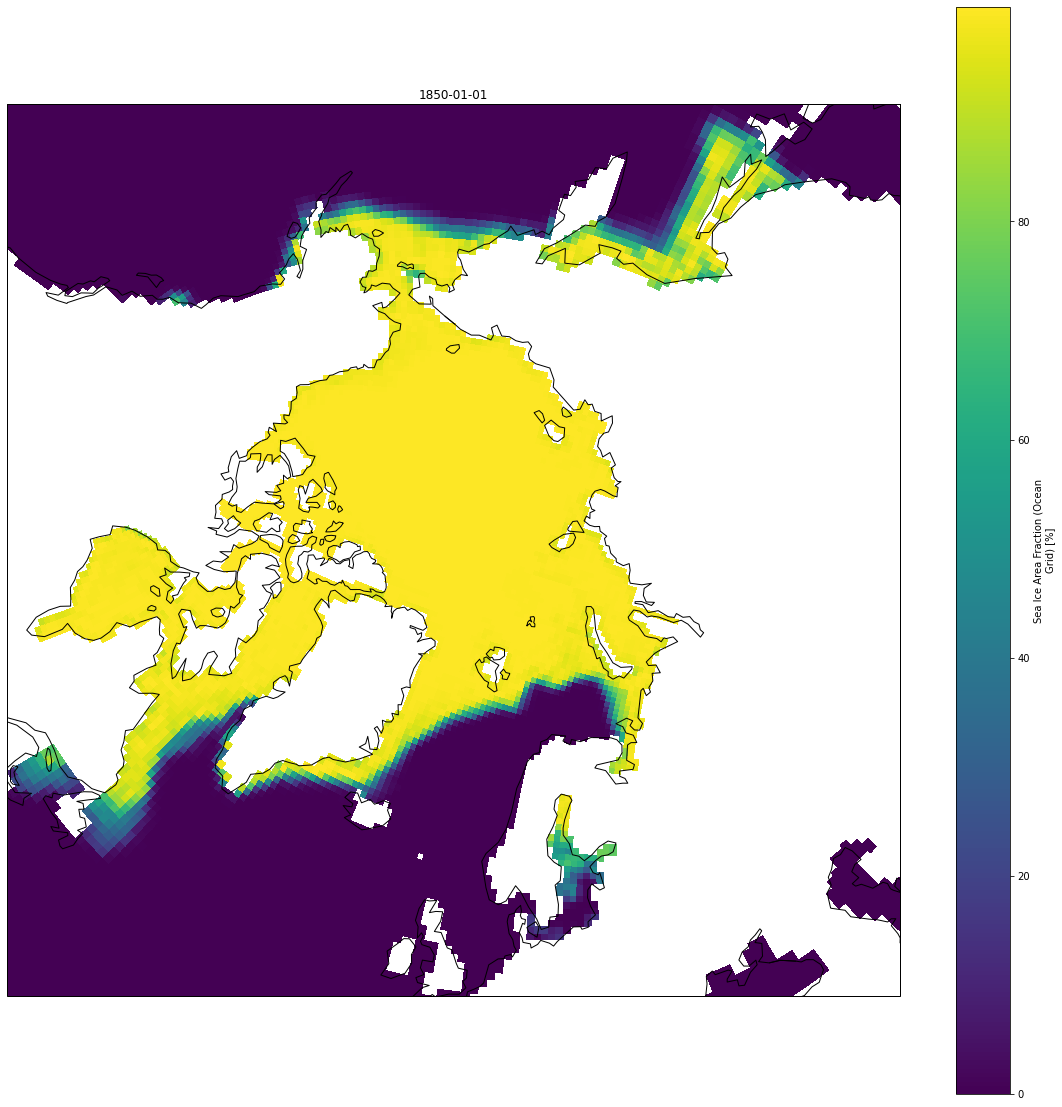

In [ ]:
# first we set up our axes with the projection that we want
ax = plt.axes(projection=ccrs.NorthPolarStereo());
# then we set the latitude limits on our figure (here, we include all longitudes
# (-180° -> 180°) and 55°N -> 90°N)
ax.set_extent([-180, 180, 50, 100], ccrs.PlateCarree())
# now we tell xarray to plot our data. We pass a number of extra parameters:
# transform=ccrs.PlateCarree() -> tells xarray how to transform the data
# x='nav_lon' -> tells xarray the name of the longitude variable
# y='nav_lat' -> tells xarray the name of the latitude variable
ds.siconc[0].plot.pcolormesh(ax=ax,transform=ccrs.PlateCarree(),x='nav_lon', y='nav_lat', add_colorbar=True); 
plt.title('1850-01-01')
# finally, we add the coastlines
ax.coastlines();



*   Siconc Map at Time: 2014-12-16



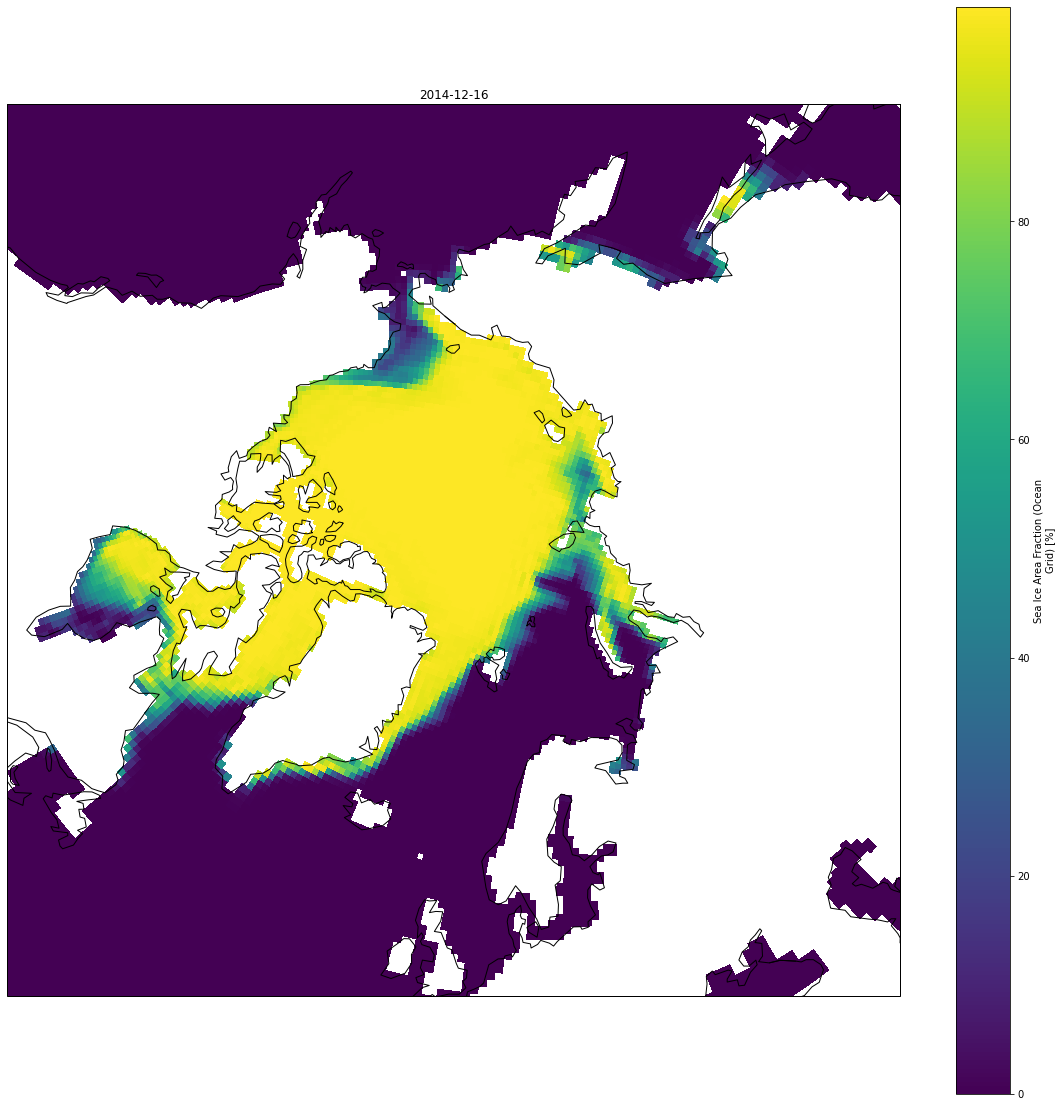

In [ ]:
# first we set up our axes with the projection that we want
ax = plt.axes(projection=ccrs.NorthPolarStereo());
# then we set the latitude limits on our figure (here, we include all longitudes
# (-180° -> 180°) and 55°N -> 90°N)
ax.set_extent([-180, 180, 50, 100], ccrs.PlateCarree())
# now we tell xarray to plot our data. We pass a number of extra parameters:
# transform=ccrs.PlateCarree() -> tells xarray how to transform the data
# x='nav_lon' -> tells xarray the name of the longitude variable
# y='nav_lat' -> tells xarray the name of the latitude variable
ds.siconc[-1].plot.pcolormesh(ax=ax,transform=ccrs.PlateCarree(),x='nav_lon', y='nav_lat', add_colorbar=True); 
plt.title('2014-12-16')
# finally, we add the coastlines
ax.coastlines();



*   Siconc Difference between the two previous date. It allows to show sea ice melting. 



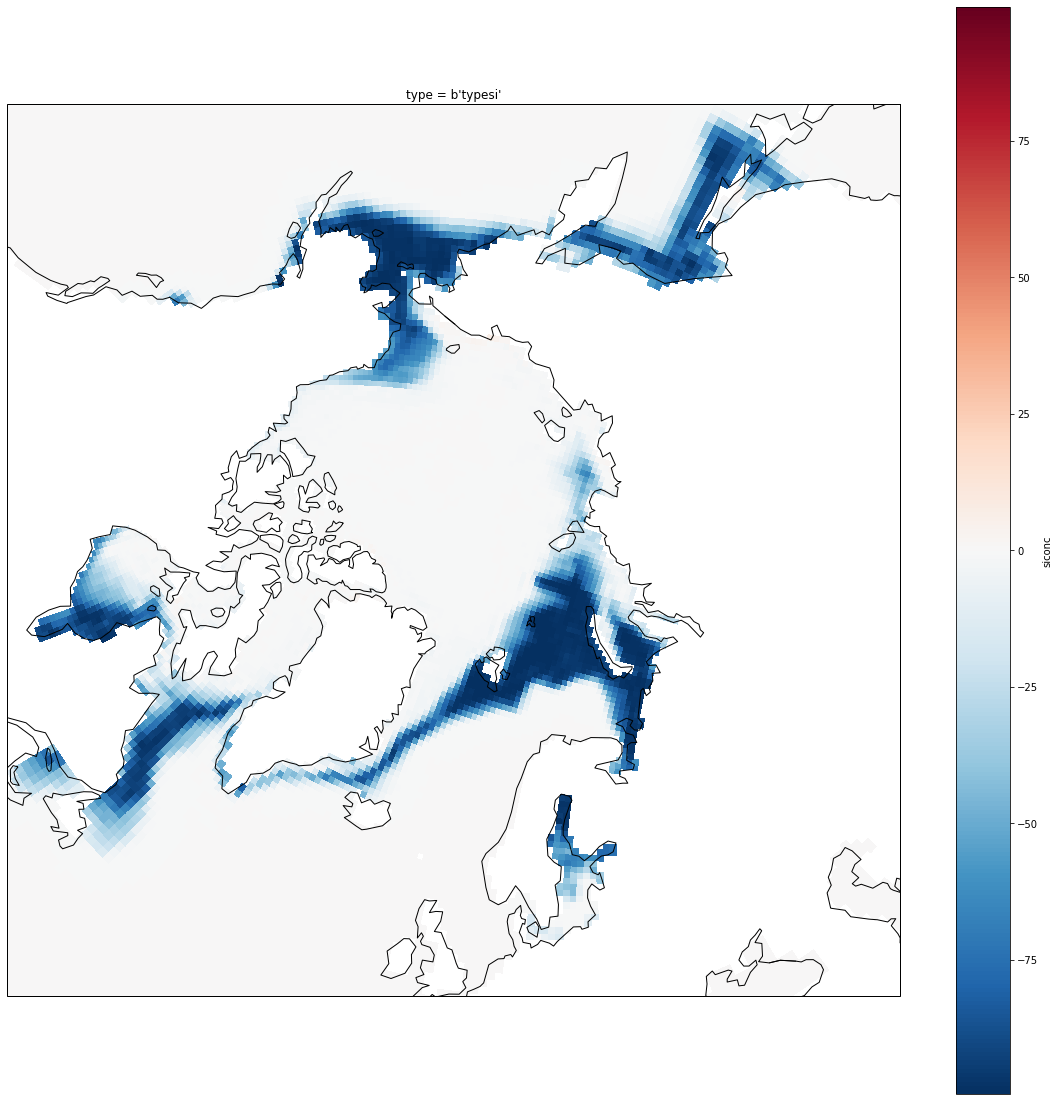

In [ ]:
# first we set up our axes with the projection that we want
ax = plt.axes(projection=ccrs.NorthPolarStereo());
# then we set the latitude limits on our figure (here, we include all longitudes
# (-180° -> 180°) and 55°N -> 90°N)
ax.set_extent([-180, 180, 50, 100], ccrs.PlateCarree())
# now we tell xarray to plot our data. We pass a number of extra parameters:
# transform=ccrs.PlateCarree() -> tells xarray how to transform the data
# x='nav_lon' -> tells xarray the name of the longitude variable
# y='nav_lat' -> tells xarray the name of the latitude variable
(ds.siconc[-1]-ds.siconc[0]).plot.pcolormesh(ax=ax,transform=ccrs.PlateCarree(),x='nav_lon', y='nav_lat', add_colorbar=True); 
# finally, we add the coastlines
ax.coastlines();

What should be interesting was to do the same between the 1850 summer and 2014. However, after a date there isn't sea ice during summer.

# Linear and Seasonal Regression

First, a basic linear regression function of time and prediction up to 2100.

In [ ]:
from sklearn.linear_model import LinearRegression

X1 = transpose([[round(1850*365.25+ i*365.25/12) for i in range(len(ds.time))], [0 for i in range(len(ds.time))]])
X1p = transpose([[round(1850*365.25+ i*365.25/12) for i in range(3000)], [0 for i in range(3000)]])
y1 = ds.siconc.mean(['x', 'y'])

print('The shape of X is {}'.format(X1.shape))
print('The shape of y is {}'.format(y1.shape))

# 1: create the model, as before
model1 = LinearRegression()

# 2: fit the model, as before
model1.fit(X1, y1)

print('Model coefficients for a: {}'.format(model1.coef_))
print('Model coefficient for b: {}'.format(model1.intercept_))

The shape of X is (1980, 2)
The shape of y is (1980,)
Model coefficients for a: [-3.06007241e-05  0.00000000e+00]
Model coefficient for b: 37.955443339678425


No handles with labels found to put in legend.


Model score: 0.032526665970502244


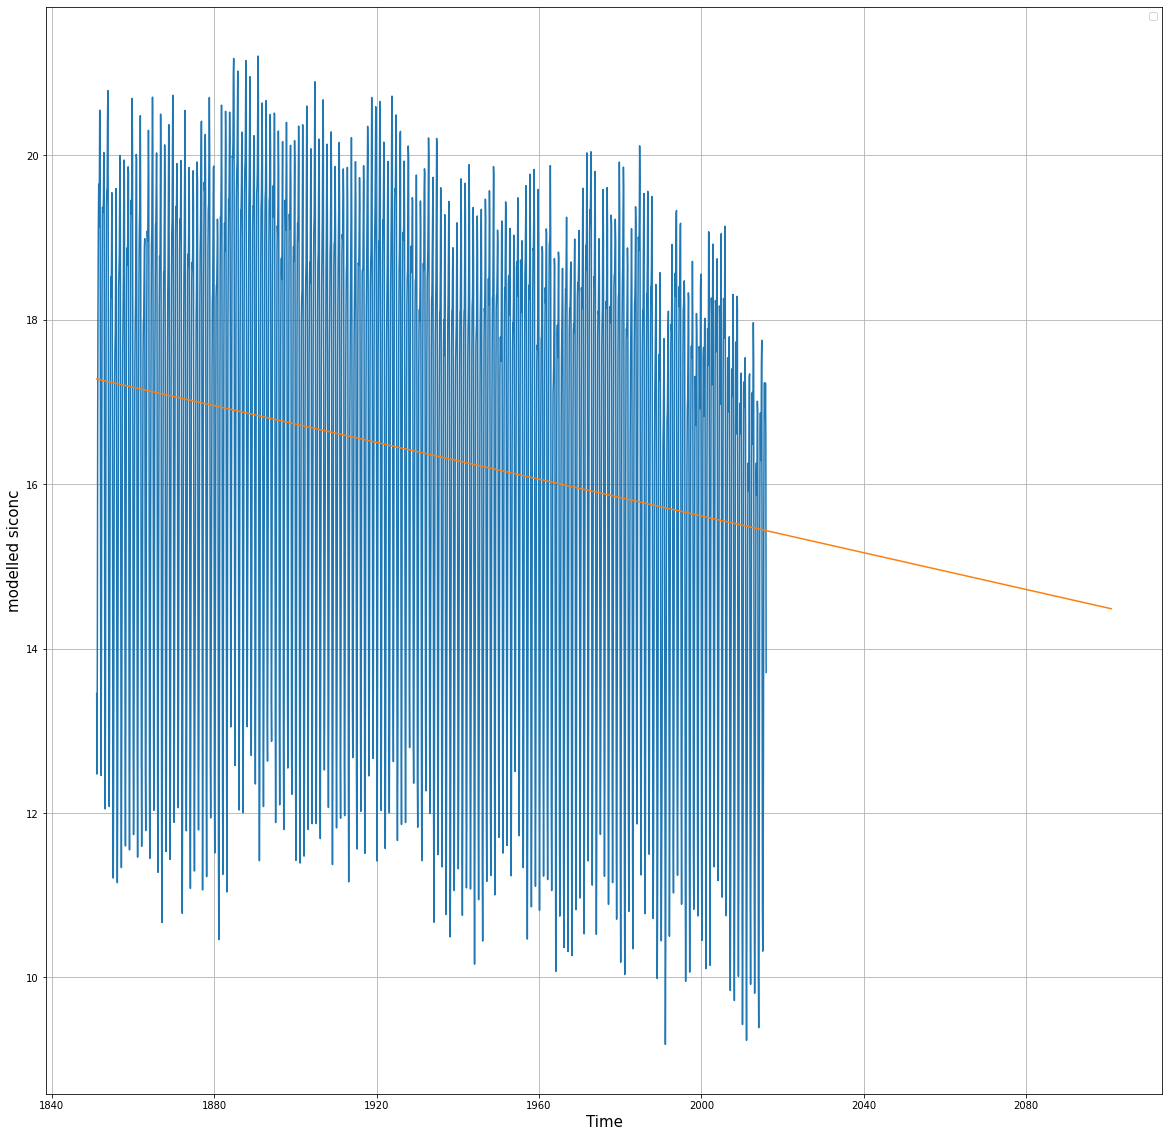

In [ ]:
# 3: get predicted values for y, as before
y_hat1 = model1.predict(X1p)

# 4: plot the real and modelled values
plt.figure()
plot_ts(transpose(X1)[0],y1,'-','siconc mean')
plot_ts(transpose(X1p)[0],y_hat1,'-','modelled siconc')
plt.legend()
plt.grid()

print('Model score: {}'.format(model1.score(X1,y1)))

This model is the simpliest, the score is very low (0.0325), but the trend is well fit.




---
<br>
Now, we will do a linear regression and consider seasonal influence with time sinus and cosinus with a period of 365.





In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

print(ds.time[0])

time = [round(1850*365.25+ i*365.25/12) for i in range(len(ds.time))]
timep = [round(1850*365.25+ i*365.25/12) for i in range(3000)]

sin = [np.sin((2*np.pi*i)/365) for i in time]
cos = [np.cos((2*np.pi*i)/365) for i in time]
 
sinp = [np.sin((2*np.pi*i)/365) for i in timep]
cosp = [np.cos((2*np.pi*i)/365) for i in timep]

X2 = transpose([time, sin, cos])
X2p = transpose([timep, sinp, cosp])
y2 = ds.siconc.mean(['x', 'y'])

print('The shape of X is {}'.format(X2.shape))
print('The shape of y is {}'.format(y2.shape))

The shape of X is (1980, 3)
The shape of y is (1980,)


In [ ]:
# 1: create the model, as before
model2 = LinearRegression()

# 2: fit the model, as before
model2.fit(X2,y2)

print('Model coefficients for [a1, a2, a3]: {}'.format(model2.coef_))
print('Model coefficient for b: {}'.format(model2.intercept_))

Model coefficients for [a1, a2, a3]: [-3.11512498e-05 -1.29707643e+00  3.35476628e+00]
Model coefficient for b: 38.34529661188848


No handles with labels found to put in legend.


Model score: 0.7746653009116451


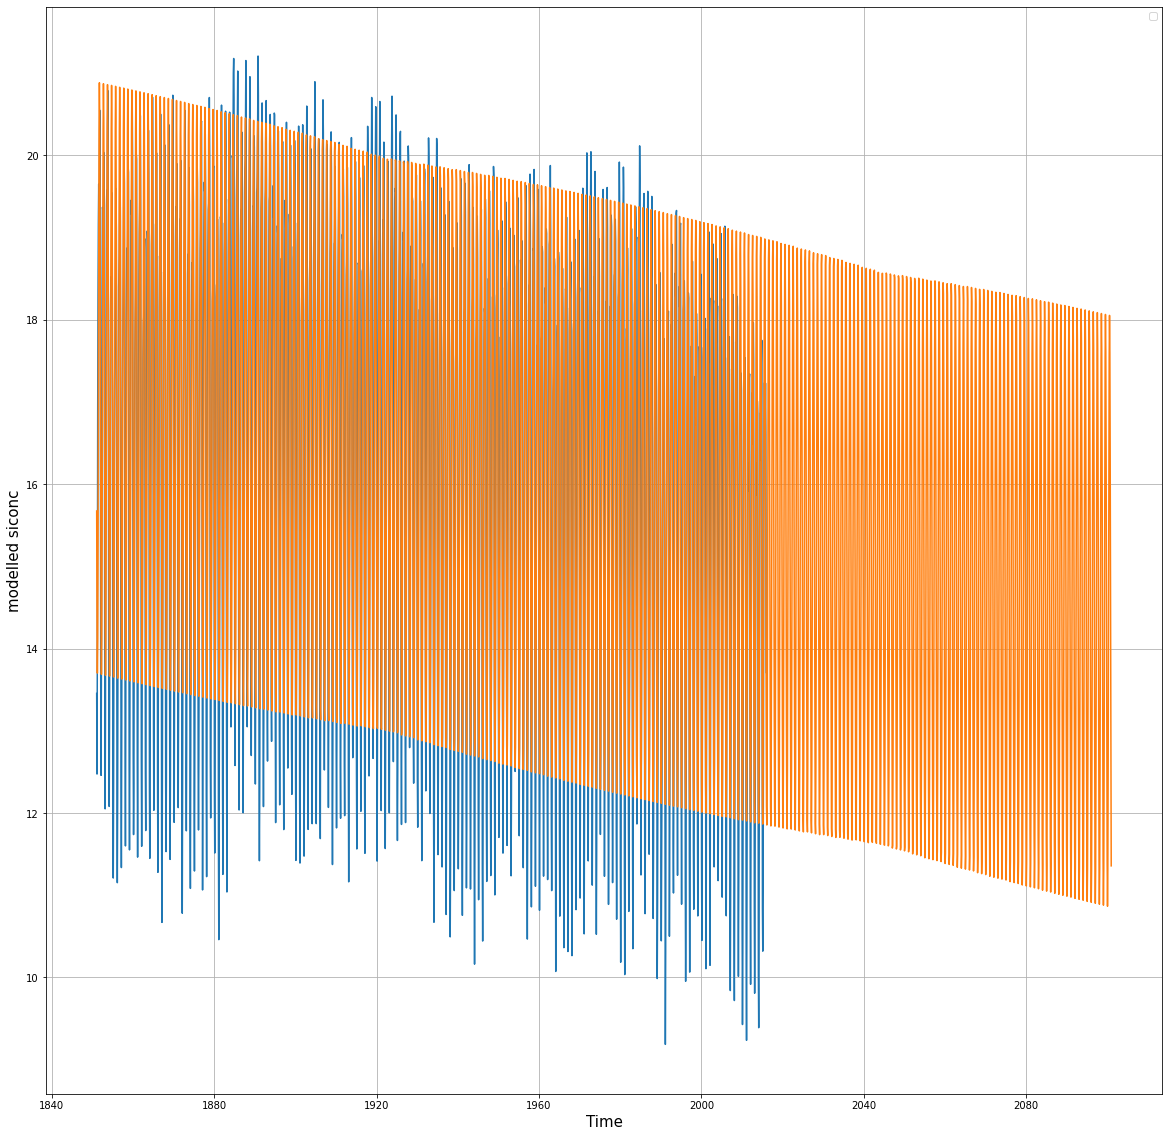

In [ ]:
# 3: get predicted values for y, as before
y_hat2 = model2.predict(X2p)

# 4: plot the real and modelled values
plt.figure()
plot_ts(time,y2,'-','siconc')
plot_ts(timep,y_hat2,'-','modelled siconc')
plt.legend()
plt.grid()

print('Model score: {}'.format(model2.score(X2,y2)))

This model is much better (the score is 0.7746), but it is very symetric and don't fluctuated as the real time serie.


---
<br>
We will compare our model with the diffrents ssp experiments. Using a rolling mean over 60 times because it is more legible than a full time serie.




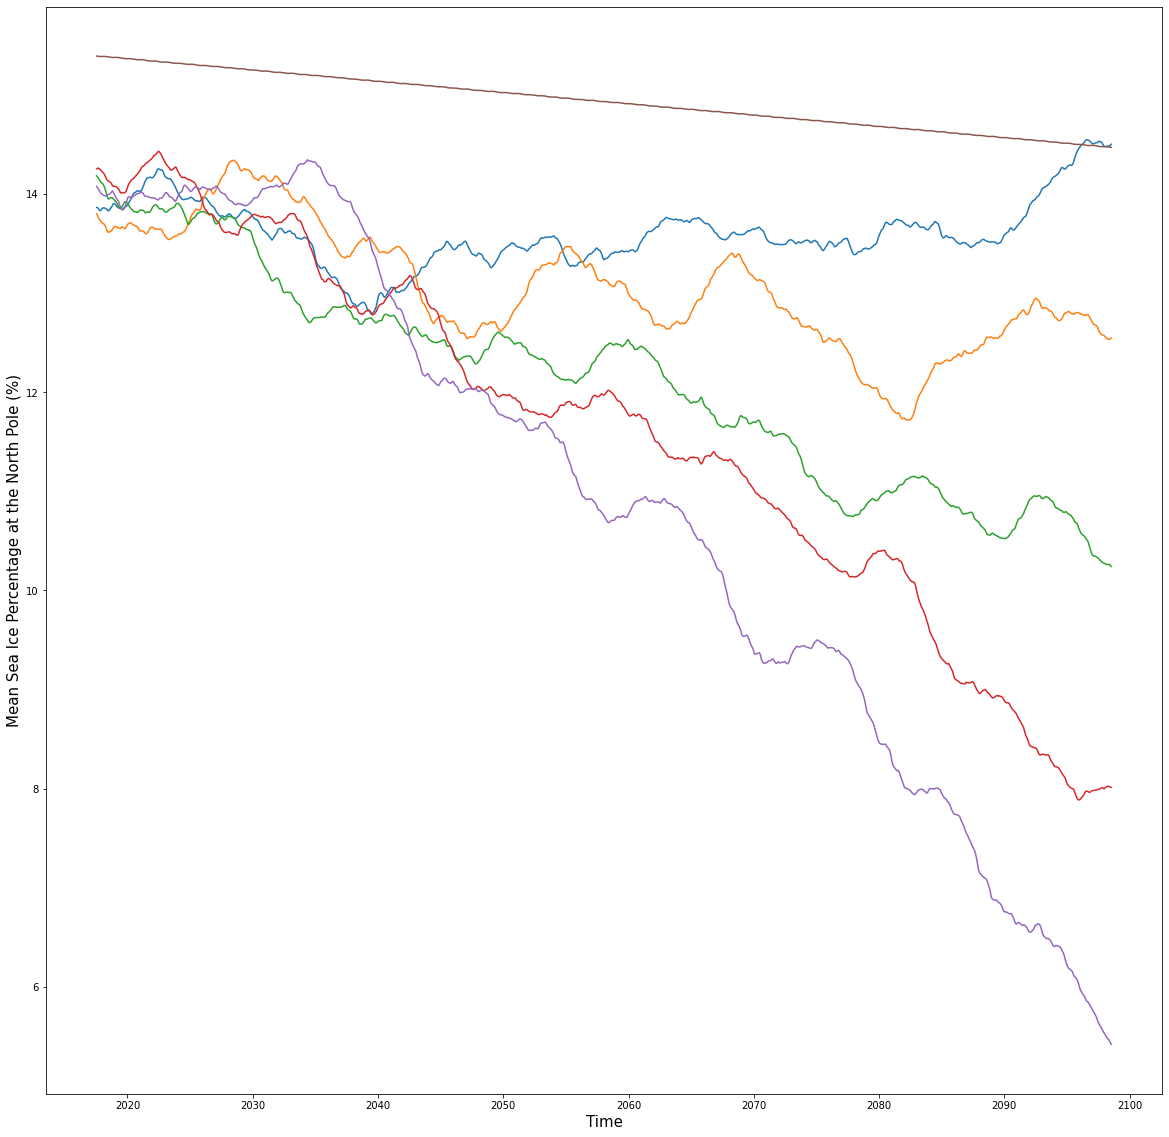

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

timec = [round(2014*365.25+ i*365.25/12+ 11*365.25/12) for i in range(1032)]

sinc = [np.sin((2*np.pi*i)/365) for i in timec]
cosc = [np.cos((2*np.pi*i)/365) for i in timec]

X2c = transpose([timec, sinc, cosc])

siconc2100 = model2.predict(X2c)

ssp = ['ssp119','ssp126','ssp245','ssp370','ssp585']
MSE = []
MAE = []

plt.figure()
for i in range(len(ssp)):
  df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
  df_siconc = df.query("table_id == 'SImon' & variable_id == 'siconc' & member_id == 'r1i1p1f1' & institution_id == 'IPSL' & experiment_id == '{}'" .format(ssp[i]))
  df_siconc

  # setup the gcs access
  gcs = gcsfs.GCSFileSystem(token='anon')
  # get the path to a specific zarr store (the first one from the dataframe above)
  zstore = df_siconc.zstore.values[-1]
  # create a mapping interface to the store
  mapper = gcs.get_mapper(zstore)
  # open it using xarray and zarr
  ds = xr.open_zarr(mapper, consolidated=True)
  ds

  plt.plot(ds.time, ds.siconc.mean(['x', 'y']).rolling(time=60, center=True).mean())

  mse = mean_squared_error(siconc2100, ds.siconc.mean(['x', 'y']))
  mae = mean_absolute_error(siconc2100, ds.siconc.mean(['x', 'y']))
  MSE.append(mse)
  MAE.append(mae)

plot_ts(ds.time, pd.DataFrame(data ={'col2': siconc2100}).rolling(60, center=True).mean(), '-', 'Mean Sea Ice Percentage at the North Pole (%)')

In [ ]:
print(MSE)

[3.801239899204579, 5.422078572230043, 10.238519627088548, 15.823036624797087, 25.447002912079277]


Our model look like really simple and optimistic. It is du to the fact that we only consider time has influence. Our model is close to the ssp119 and ssp126 according mse.

# Support Vector Machine

To better our model, I would try to use another machine learning regression model: svm regression (I learn after that non-parametric method don't worked well for predictions).

In [ ]:
# and load in the SICONC data
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df_siconc = df.query(" table_id == 'SImon' & variable_id == 'siconc' & experiment_id == 'historical' & member_id == 'r1i1p1f1' & institution_id == 'IPSL'")
df_siconc

# setup the gcs access
gcs = gcsfs.GCSFileSystem(token='anon')

# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_siconc.zstore.values[-1]

# create a mapping interface to the store
mapper = gcs.get_mapper(zstore)

# open it using xarray and zarr
ds = xr.open_zarr(mapper, consolidated=True)

No handles with labels found to put in legend.


Model score: -0.09702899583550506


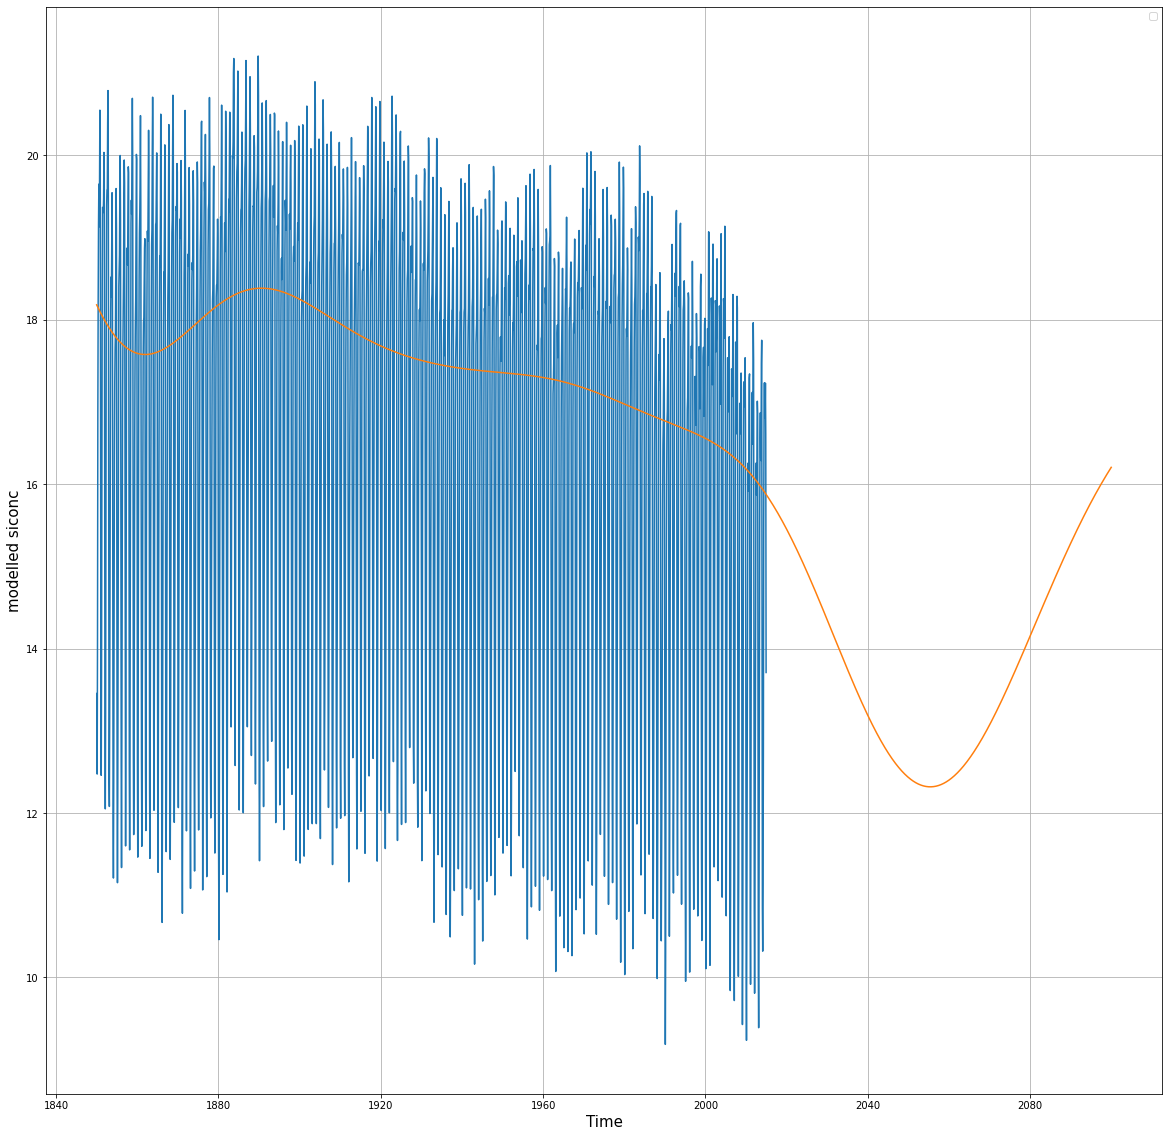

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

t = transpose([ds.time])
tp = transpose([pd.date_range(start='1/1/1850', end='1/1/2100', periods=2000)])

y = ds.siconc.mean(['x', 'y'])

# 1: create the model, as before
model = make_pipeline(StandardScaler(), SVR(C=100, epsilon=0.1)) # C=1, 10, 100

# 2: fit the model, as before
model.fit(t,y)

# 3: get predicted values for y, as before
y_hat=model.predict(tp)

# 4: plot the real and modelled values
plt.figure()
plot_ts(t,y,'-','siconc')
plot_ts(tp,y_hat,'-','modelled siconc')
plt.legend()
plt.grid()

print('Model score: {}'.format(model.score(t,y)))

As I said at the beginning, svr is zero to make prediction. But it is good to find the trend and perhaps short-times prediction are ok.


# Linear regression with more seasonal parameters

Like the presendent model didn't work, I choose to return on linear regression and try to add time sinus and cosinus with higher period (lower period didn't change anything).

## Model1



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# and load in the SICONC data
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df_siconc = df.query(" table_id == 'SImon' & variable_id == 'siconc' & experiment_id == 'historical' & member_id == 'r1i1p1f1' & institution_id == 'IPSL'")
df_siconc

# setup the gcs access
gcs = gcsfs.GCSFileSystem(token='anon')

# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_siconc.zstore.values[-1]

# create a mapping interface to the store
mapper = gcs.get_mapper(zstore)

# open it using xarray and zarr
ds = xr.open_zarr(mapper, consolidated=True)

time = [round(1850*365.25+ i*365.25/12) for i in range(len(ds.time))]

sin = [np.sin((2*np.pi*i)/365) for i in time]
cos = [np.cos((2*np.pi*i)/365) for i in time]
cosm = [np.cos((2*np.pi*i)/(24*365)) for i in time]
sinm = [np.sin((2*np.pi*i)/(24*365)) for i in time]
coss = [np.cos((2*np.pi*i)/(24*60*365)) for i in time]
sins = [np.sin((2*np.pi*i)/(24*60*365)) for i in time]

X3 = transpose([time, cos, sin, cosm, coss, sinm, sins])
#X2 = transpose([time, sin, cos, sisnmass, sitemptop, six, siy])
y = ds.siconc.mean(['x', 'y'])

print('The shape of X is {}'.format(X3.shape))
print('The shape of y is {}'.format(y.shape))

The shape of X is (1980, 7)
The shape of y is (1980,)


In [ ]:
# 1: create the model, as before
model3 = LinearRegression()

# 2: fit the model, as before
model3.fit(X3,y)

print('Model coefficients for [a1, a2, a3]: {}'.format(model3.coef_))
print('Model coefficient for b: {}'.format(model3.intercept_))

Model coefficients for [a1, a2, a3]: [ 5.00405202e-04  3.35424970e+00 -1.29639854e+00 -1.23575388e-01
  3.11541482e+01  8.85210366e-02  3.44781400e+01]
Model coefficient for b: -348.19392748028014


No handles with labels found to put in legend.


Model score: 0.7816916852661118


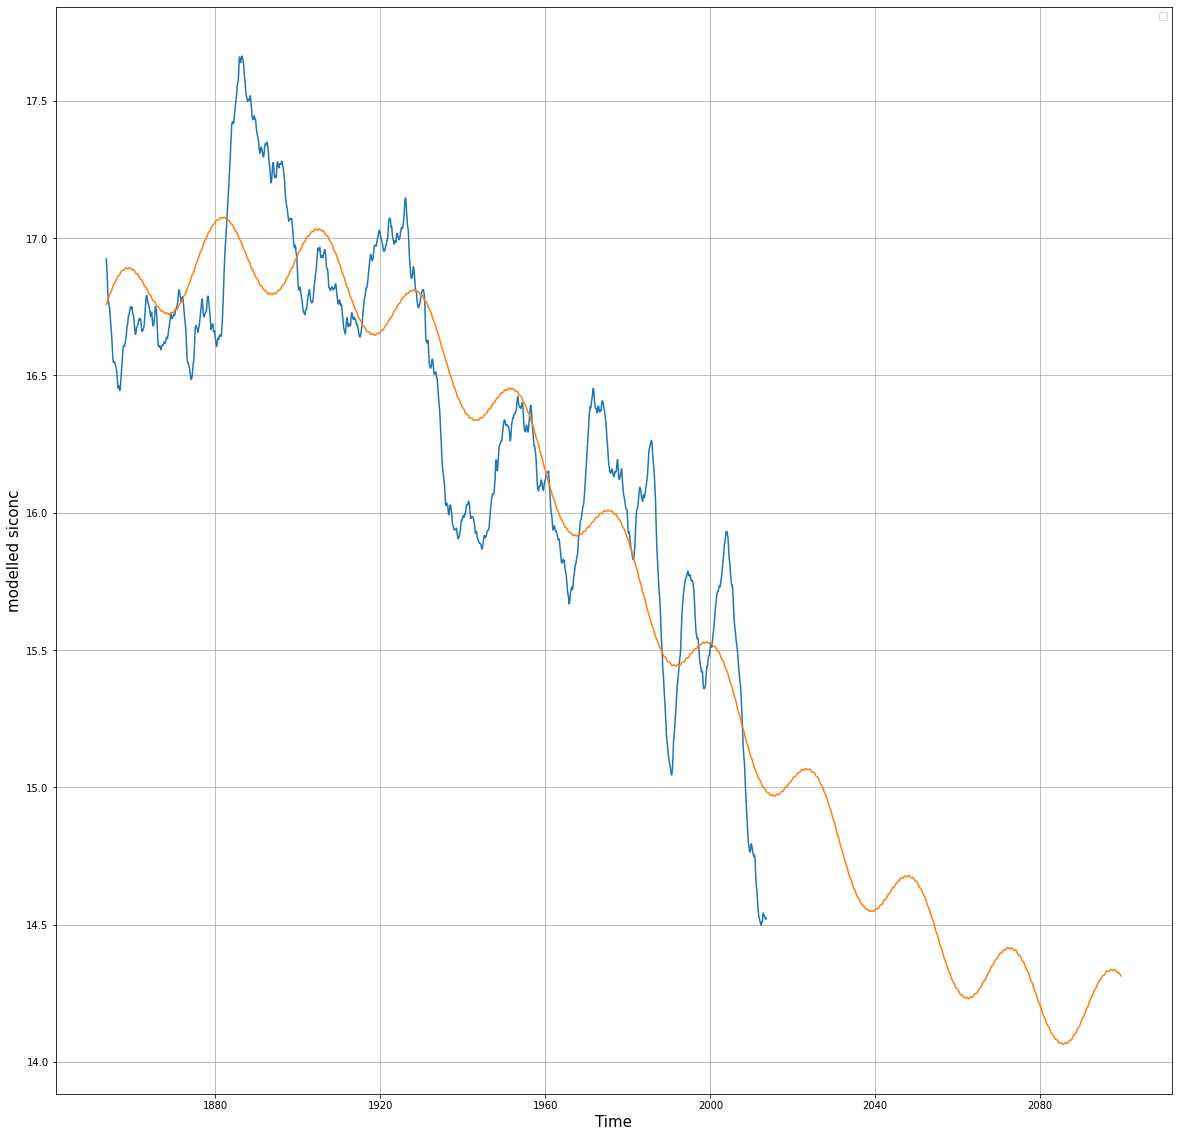

In [ ]:
timep = [round(1850*365.25+ i*365.25/12) for i in range(1980+1032)]

sinp = [np.sin((2*np.pi*i)/365) for i in timep]
cosp = [np.cos((2*np.pi*i)/365) for i in timep]
cosmp = [np.cos((2*np.pi*i)/(24*365)) for i in timep]
sinmp = [np.sin((2*np.pi*i)/(24*365)) for i in timep]
cossp = [np.cos((2*np.pi*i)/(24*60*365)) for i in timep]
sinsp = [np.sin((2*np.pi*i)/(24*60*365)) for i in timep]

Xp = transpose([timep, cosp, sinp, cosmp, cossp, sinmp, sinsp])

# 3: get predicted values for y, as before
y_hat = model3.predict(Xp)

# 4: plot the real and modelled values
plt.figure()
plot_ts(time,y.rolling(time=60, center=True).mean(),'-','siconc')
plot_ts(timep,pd.DataFrame(data ={'col2': y_hat}).rolling(60, center=True).mean(),'-','modelled siconc')
plt.legend()
plt.grid()

print('Model score: {}'.format(model3.score(Xp[:1980],y)))

We improve a lot our model, the score is a little bit better (0.7816).



---
<br>
Let's compared it with the ssp experiments.



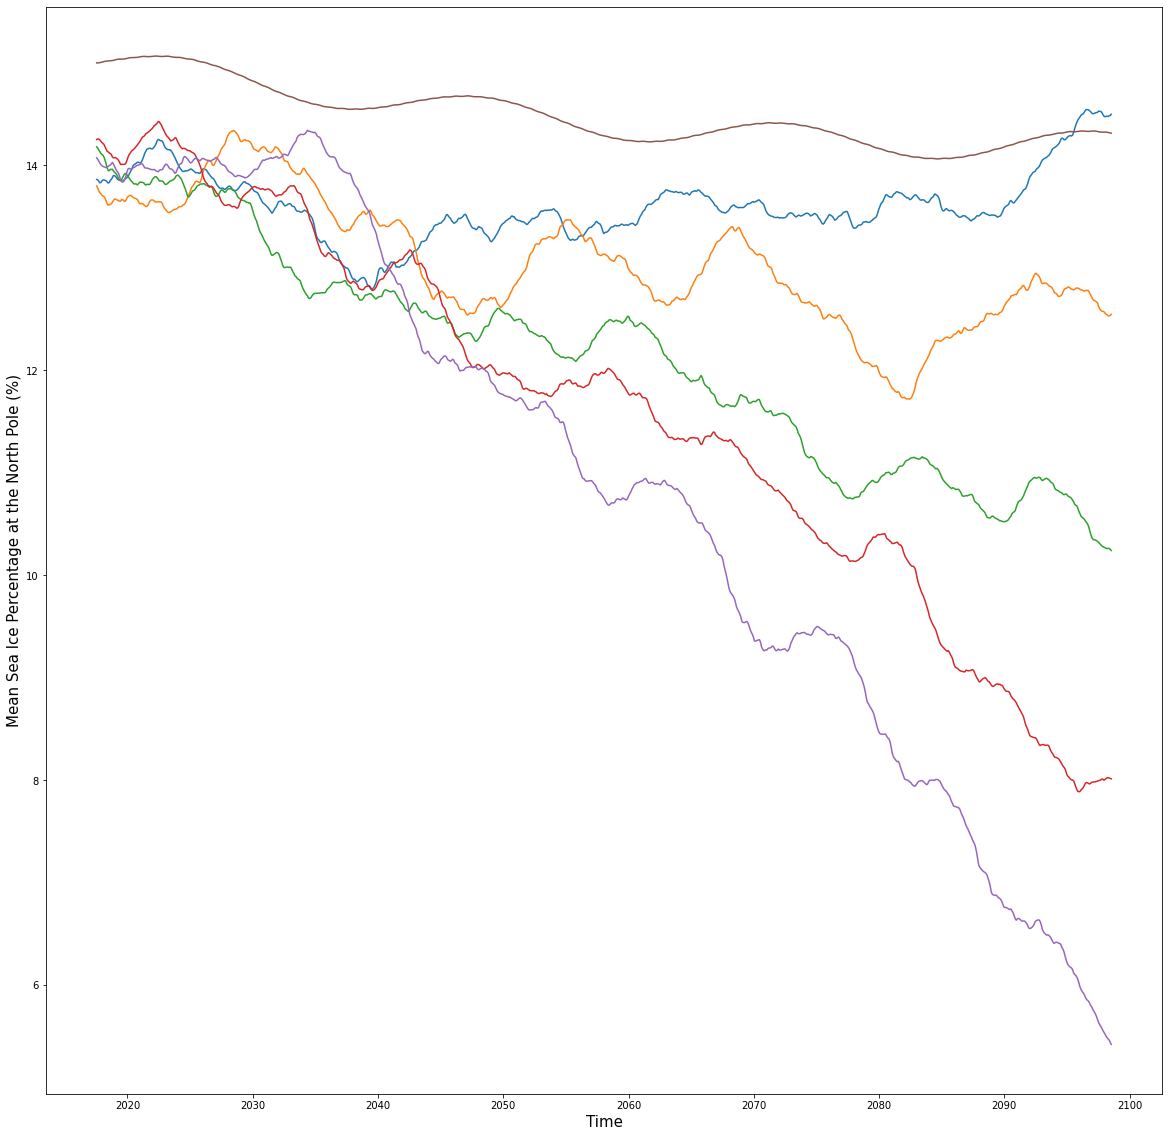

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

timec = [round(2014*365.25+ i*365.25/12+ 11*365.25/12) for i in range(1032)]

sinc = [np.sin((2*np.pi*i)/365) for i in timec]
cosc = [np.cos((2*np.pi*i)/365) for i in timec]
cosmc = [np.cos((2*np.pi*i)/(24*365)) for i in timec]
sinmc = [np.sin((2*np.pi*i)/(24*365)) for i in timec]
cossc = [np.cos((2*np.pi*i)/(24*60*365)) for i in timec]
sinsc = [np.sin((2*np.pi*i)/(24*60*365)) for i in timec]

Xc = transpose([timec, cosc, sinc, cosmc, cossc, sinmc, sinsc])

siconc2100 = model3.predict(Xc)

ssp = ['ssp119','ssp126','ssp245','ssp370','ssp585']
MSE = []
MAE = []

plt.figure()
for i in range(len(ssp)):
  df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
  df_siconc = df.query("table_id == 'SImon' & variable_id == 'siconc' & member_id == 'r1i1p1f1' & institution_id == 'IPSL' & experiment_id == '{}'" .format(ssp[i]))
  df_siconc

  # setup the gcs access
  gcs = gcsfs.GCSFileSystem(token='anon')
  # get the path to a specific zarr store (the first one from the dataframe above)
  zstore = df_siconc.zstore.values[-1]
  # create a mapping interface to the store
  mapper = gcs.get_mapper(zstore)
  # open it using xarray and zarr
  ds = xr.open_zarr(mapper, consolidated=True)
  ds

  plt.plot(ds.time, ds.siconc.mean(['x', 'y']).rolling(time=60, center=True).mean())

  mse = mean_squared_error(siconc2100, ds.siconc.mean(['x', 'y']))
  mae = mean_absolute_error(siconc2100, ds.siconc.mean(['x', 'y']))
  MSE.append(mse)
  MAE.append(mae)

plot_ts(ds.time, pd.DataFrame(data ={'col2': siconc2100}).rolling(60, center=True).mean(), '-', 'Mean Sea Ice Percentage at the North Pole (%)')

Our model is too optimistic, yet.

## Model2

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# and load in the SICONC data
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df_siconc = df.query(" table_id == 'SImon' & variable_id == 'siconc' & experiment_id == 'historical' & member_id == 'r1i1p1f1' & institution_id == 'IPSL'")
df_siconc

# setup the gcs access
gcs = gcsfs.GCSFileSystem(token='anon')

# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_siconc.zstore.values[-1]

# create a mapping interface to the store
mapper = gcs.get_mapper(zstore)

# open it using xarray and zarr
ds = xr.open_zarr(mapper, consolidated=True)

time = [round(1850*365.25+ i*365.25/12) for i in range(len(ds.time))]

sin = [np.sin((2*np.pi*i)/365) for i in time]
cos = [np.cos((2*np.pi*i)/365) for i in time]
cosm = [np.cos((2*np.pi*i)/(24*365)) for i in time]
sinm = [np.sin((2*np.pi*i)/(24*365)) for i in time]
coss = [np.cos((2*np.pi*i)/(24*30*365)) for i in time]
sins = [np.sin((2*np.pi*i)/(24*30*365)) for i in time]
cosa = [np.cos((2*np.pi*i)/(24*60*365)) for i in time]
sina = [np.sin((2*np.pi*i)/(24*60*365)) for i in time]

X3 = transpose([time, cos, sin, cosm, coss, sinm, sins, cosa, sina])
#X2 = transpose([time, sin, cos, sisnmass, sitemptop, six, siy])
y = ds.siconc.mean(['x', 'y'])

print('The shape of X is {}'.format(X3.shape))
print('The shape of y is {}'.format(y.shape))

The shape of X is (1980, 9)
The shape of y is (1980,)


In [ ]:
# 1: create the model, as before
model3 = LinearRegression()

# 2: fit the model, as before
model3.fit(X3,y)

print('Model coefficients for [a1, a2, a3]: {}'.format(model3.coef_))
print('Model coefficient for b: {}'.format(model3.intercept_))

Model coefficients for [a1, a2, a3]: [-1.89031743e-01  3.35563779e+00 -1.29571344e+00 -1.04672292e-01
 -2.44215494e+03  5.58688077e-02  1.20524813e+03 -1.80559930e+04
 -1.12129763e+04]
Model coefficient for b: 132995.67442074875


No handles with labels found to put in legend.


Model score: 0.7843992150685857


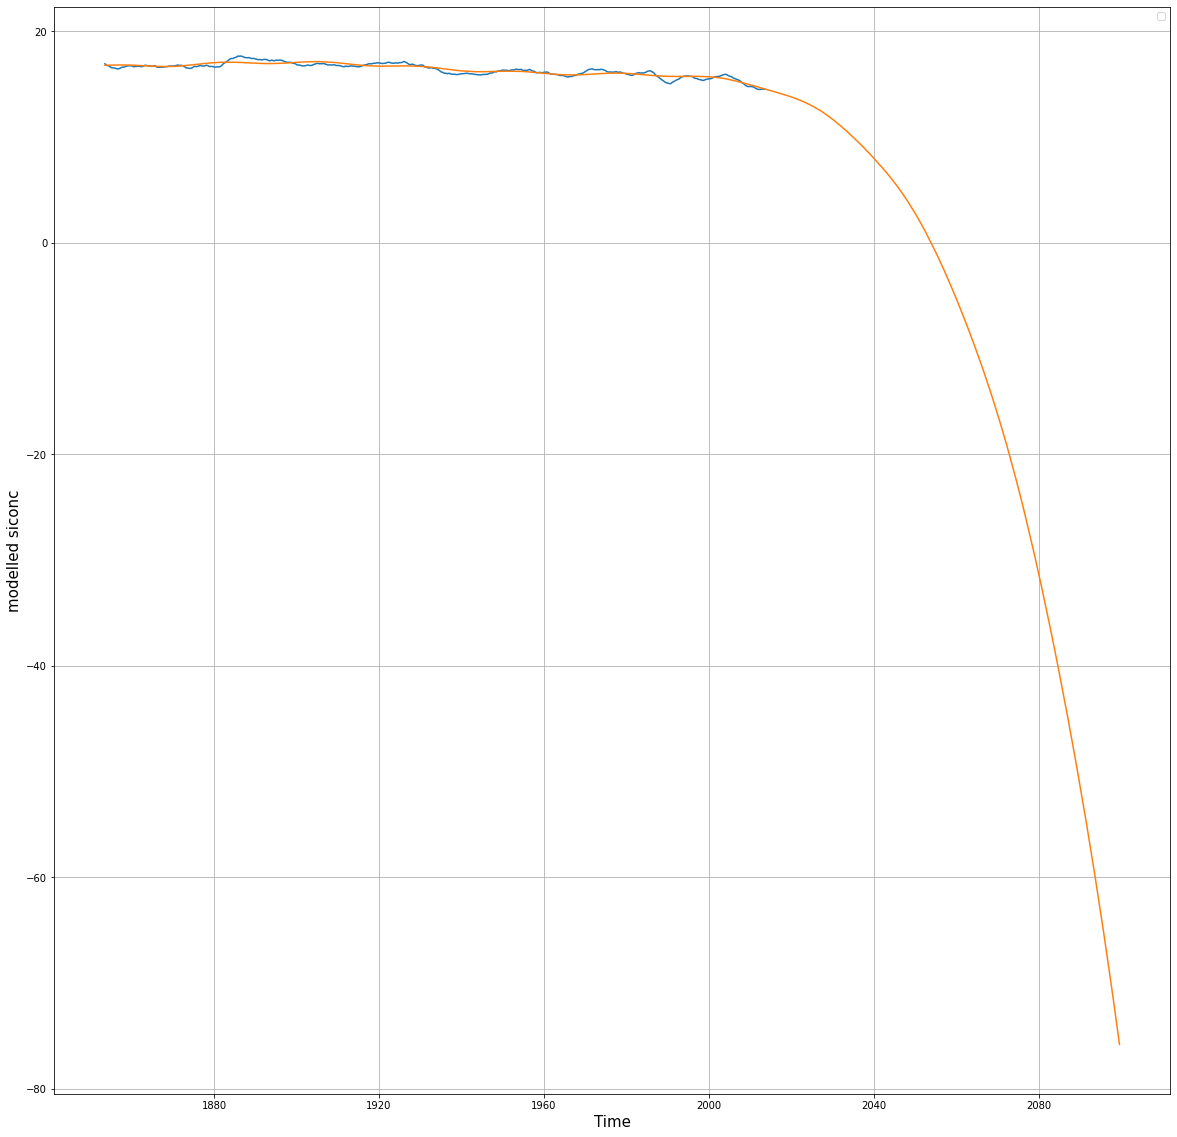

In [ ]:
timep = [round(1850*365.25+ i*365.25/12) for i in range(1980+1032)]

sinp = [np.sin((2*np.pi*i)/365) for i in timep]
cosp = [np.cos((2*np.pi*i)/365) for i in timep]
cosmp = [np.cos((2*np.pi*i)/(24*365)) for i in timep]
sinmp = [np.sin((2*np.pi*i)/(24*365)) for i in timep]
cossp = [np.cos((2*np.pi*i)/(24*30*365)) for i in timep]
sinsp = [np.sin((2*np.pi*i)/(24*30*365)) for i in timep]
cosap = [np.cos((2*np.pi*i)/(24*60*365)) for i in timep]
sinap = [np.sin((2*np.pi*i)/(24*60*365)) for i in timep]

Xp = transpose([timep, cosp, sinp, cosmp, cossp, sinmp, sinsp, cosap, sinap])

# 3: get predicted values for y, as before
y_hat = model3.predict(Xp)

# 4: plot the real and modelled values
plt.figure()
plot_ts(time,y.rolling(time=60, center=True).mean(),'-','siconc')
plot_ts(timep,pd.DataFrame(data ={'col2': y_hat}).rolling(60, center=True).mean(),'-','modelled siconc')
plt.legend()
plt.grid()

print('Model score: {}'.format(model3.score(Xp[:1980],y)))

We improve a lot our model, the score is a little bit better (0.7843).



---
<br>
Let's compared it with the ssp experiments.



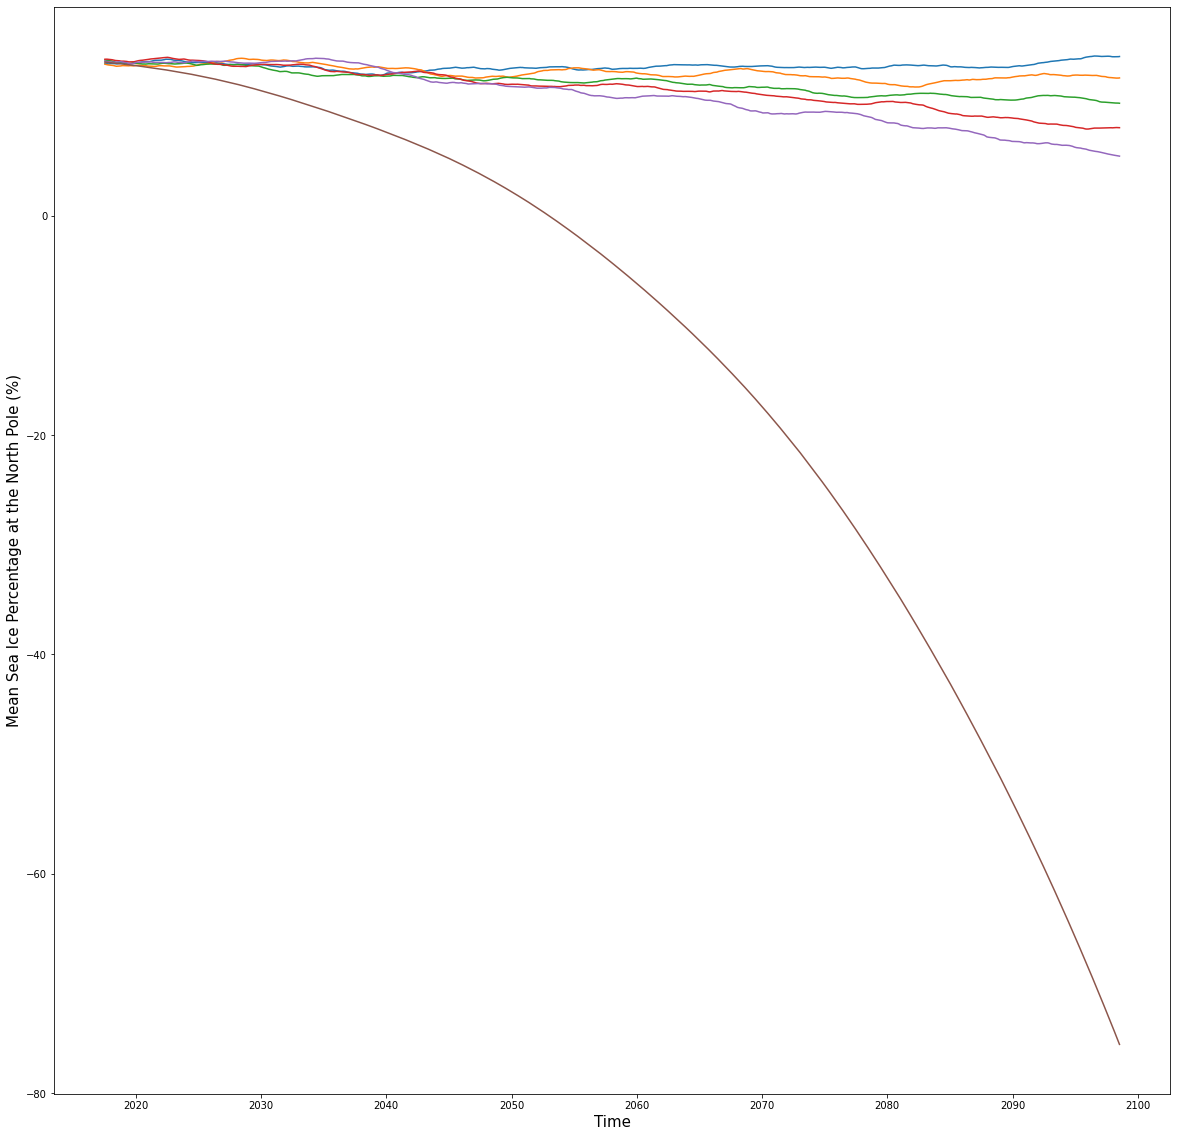

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

timec = [round(2014*365.25+ i*365.25/12+ 11*365.25/12) for i in range(1032)]

sinc = [np.sin((2*np.pi*i)/365) for i in timec]
cosc = [np.cos((2*np.pi*i)/365) for i in timec]
cosmc = [np.cos((2*np.pi*i)/(24*365)) for i in timec]
sinmc = [np.sin((2*np.pi*i)/(24*365)) for i in timec]
cossc = [np.cos((2*np.pi*i)/(24*30*365)) for i in timec]
sinsc = [np.sin((2*np.pi*i)/(24*30*365)) for i in timec]
cosac = [np.cos((2*np.pi*i)/(24*60*365)) for i in timec]
sinac = [np.sin((2*np.pi*i)/(24*60*365)) for i in timec]

Xc = transpose([timec, cosc, sinc, cosmc, cossc, sinmc, sinsc, cosac, sinac])

siconc2100 = model3.predict(Xc)

ssp = ['ssp119','ssp126','ssp245','ssp370','ssp585']
MSE = []
MAE = []

plt.figure()
for i in range(len(ssp)):
  df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
  df_siconc = df.query("table_id == 'SImon' & variable_id == 'siconc' & member_id == 'r1i1p1f1' & institution_id == 'IPSL' & experiment_id == '{}'" .format(ssp[i]))
  df_siconc

  # setup the gcs access
  gcs = gcsfs.GCSFileSystem(token='anon')
  # get the path to a specific zarr store (the first one from the dataframe above)
  zstore = df_siconc.zstore.values[-1]
  # create a mapping interface to the store
  mapper = gcs.get_mapper(zstore)
  # open it using xarray and zarr
  ds = xr.open_zarr(mapper, consolidated=True)
  ds

  plt.plot(ds.time, ds.siconc.mean(['x', 'y']).rolling(time=60, center=True).mean())

  mse = mean_squared_error(siconc2100, ds.siconc.mean(['x', 'y']))
  mae = mean_absolute_error(siconc2100, ds.siconc.mean(['x', 'y']))
  MSE.append(mse)
  MAE.append(mae)

plot_ts(ds.time, pd.DataFrame(data ={'col2': siconc2100}).rolling(60, center=True).mean(), '-', 'Mean Sea Ice Percentage at the North Pole (%)')

# Linear Regressin with ssp predictions

The command below gives us all the variables predicted by ssp245 from the table SImon.

In [ ]:
# and load in the SICONC data
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df_snd = df.query(" table_id == 'SImon' & experiment_id == 'ssp245' ")
df_snd.variable_id.unique()

array(['siconc', 'sisnthick', 'sithick', 'siarean', 'siextentn',
       'sisnconc', 'siareas', 'siconca', 'sivoln', 'sivols', 'simass',
       'sisnmass', 'sispeed', 'sitemptop', 'sitimefrac', 'siu', 'siv',
       'sivol'], dtype=object)

## Data Importation 

In [ ]:
# and load in the SICONC data
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df_sithick = df.query(" table_id == 'SImon' & variable_id == 'sithick' & experiment_id == 'historical' & member_id == 'r1i1p1f1' & institution_id == 'IPSL'")
df_sithick

# setup the gcs access
gcs = gcsfs.GCSFileSystem(token='anon')

# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_sithick.zstore.values[-1]

# create a mapping interface to the store
mapper = gcs.get_mapper(zstore)

# open it using xarray and zarr
ds2 = xr.open_zarr(mapper, consolidated=True)

# and load in the SICONC data
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df_sivoln = df.query(" table_id == 'SImon' & variable_id == 'sivoln' & experiment_id == 'historical' & member_id == 'r2i1p1f1' & institution_id == 'IPSL'")
df_sivoln

# setup the gcs access
gcs = gcsfs.GCSFileSystem(token='anon')

# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_sivoln.zstore.values[-1]

# create a mapping interface to the store
mapper = gcs.get_mapper(zstore)

# open it using xarray and zarr
ds3 = xr.open_zarr(mapper, consolidated=True)



*   Sea Ice Snow Mass : sisnmass



In [ ]:
# and load in the SICONC data
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df_sitemptop = df.query(" table_id == 'SImon' & variable_id == 'sisnmass' & experiment_id == 'historical' & institution_id == 'NOAA-GFDL' & source_id == 'GFDL-ESM4' & grid_label =='gn' ")
df_sitemptop

# setup the gcs access
gcs = gcsfs.GCSFileSystem(token='anon')

# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_sitemptop.zstore.values[-1]

# create a mapping interface to the store
mapper = gcs.get_mapper(zstore)

# open it using xarray and zarr
ds4 = xr.open_zarr(mapper, decode_times=False)
sisnmass = ds4.sisnmass.mean(['x', 'y'])



*   􏰖􏰆􏰘􏰋􏰆􏰂􏰁􏰌􏰡􏰂􏰆 􏰁􏰌Temperature at Ice - Ocean Interface: sitemptop􏰓􏰎􏰍􏰔􏰝􏰚􏰊􏰆 􏰚􏰎􏰌􏰆􏰂􏰧􏰁􏰊􏰆 􏰗􏰫􏰙􏰖􏰆􏰘􏰋􏰆􏰂􏰁􏰌􏰡􏰂􏰆 􏰁􏰌 􏰓􏰎􏰍􏰔􏰝􏰚􏰊􏰆 􏰚􏰎􏰌􏰆􏰂􏰧􏰁􏰊



In [ ]:
# and load in the SICONC data
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df_sisali = df.query(" table_id == 'SImon' & variable_id == 'sitemptop' & experiment_id == 'historical' ")

# setup the gcs access
gcs = gcsfs.GCSFileSystem(token='anon')

# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_sisali.zstore.values[-1]

# create a mapping interface to the store
mapper = gcs.get_mapper(zstore)

# open it using xarray and zarr
ds5 = xr.open_zarr(mapper, decode_times=False)
sitemptop = ds5.sitemptop.mean(['lat', 'lon'])



*   X-Component of Sea Ice Velocity: siu



In [ ]:
# and load in the SICONC data
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df_sisali = df.query(" table_id == 'SImon' & variable_id == 'siu' & experiment_id == 'historical' & institution_id == 'NOAA-GFDL' ")

# setup the gcs access
gcs = gcsfs.GCSFileSystem(token='anon')

# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_sisali.zstore.values[-1]

# create a mapping interface to the store
mapper = gcs.get_mapper(zstore)

# open it using xarray and zarr
ds6 = xr.open_zarr(mapper, decode_times=False)
siu = ds6.siu.mean(['x', 'y'])



*   Y-Component of Sea Ice Velocity: siv



In [ ]:
# and load in the SICONC data
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df_sisali = df.query(" table_id == 'SImon' & variable_id == 'siv' & experiment_id == 'historical' ")

# setup the gcs access
gcs = gcsfs.GCSFileSystem(token='anon')

# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_sisali.zstore.values[-1]

# create a mapping interface to the store
mapper = gcs.get_mapper(zstore)

# open it using xarray and zarr
ds7 = xr.open_zarr(mapper, decode_times=False)
siv = ds7.siv.mean(['y', 'x'])

In [ ]:
# and load in the SICONC data
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df_snd = df.query(" table_id == 'Amon' & experiment_id == 'ssp245' ")
df_snd.variable_id.unique()



*   Total Atmospheric Mass of CO2: co2mass



In [ ]:
# and load in the SICONC data
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df_sisali = df.query(" table_id == 'Amon' & variable_id == 'co2mass' & experiment_id == 'historical' & institution_id == 'AWI' ")

# setup the gcs access
gcs = gcsfs.GCSFileSystem(token='anon')

# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_sisali.zstore.values[-1]

# create a mapping interface to the store
mapper = gcs.get_mapper(zstore)

# open it using xarray and zarr
ds8 = xr.open_zarr(mapper, decode_times=False)
co2mass = ds8.co2mass

* Surface Temparture: ts



In [ ]:
# and load in the SICONC data
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df_sisali = df.query(" table_id == 'Amon' & variable_id == 'ts' & experiment_id == 'historical' ")

# setup the gcs access
gcs = gcsfs.GCSFileSystem(token='anon')

# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_sisali.zstore.values[-1]

# create a mapping interface to the store
mapper = gcs.get_mapper(zstore)

# open it using xarray and zarr
ds8 = xr.open_zarr(mapper, decode_times=False)
ts = ds8.ts.mean(['longitude', 'latitude'])



*   Ssp245 predictons for the prévious variables 



In [ ]:
var = ['sisnmass', 'sitemptop', 'siu', 'siv', 'co2mass', 'ts']

df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df_siconc = df.query("table_id == 'SImon' & variable_id == '{}' & experiment_id == 'ssp245' & grid_label == 'gn' " .format(var[0]))

# setup the gcs access
gcs = gcsfs.GCSFileSystem(token='anon')
# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_siconc.zstore.values[-1]
# create a mapping interface to the store
mapper = gcs.get_mapper(zstore)
# open it using xarray and zarr
ds = xr.open_zarr(mapper, decode_times=False)

sisnmassp = ds.sisnmass.mean(['x', 'y'])

df_siconc = df.query("table_id == 'SImon' & variable_id == '{}' & experiment_id == 'ssp245' & grid_label == 'gn' " .format(var[1]))

# setup the gcs access
gcs = gcsfs.GCSFileSystem(token='anon')
# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_siconc.zstore.values[-1]
# create a mapping interface to the store
mapper = gcs.get_mapper(zstore)
# open it using xarray and zarr
ds = xr.open_zarr(mapper, decode_times=False)

sitemptopp = ds.sitemptop.mean(['x', 'y'])

df_siconc = df.query("table_id == 'SImon' & variable_id == '{}' & experiment_id == 'ssp245' & grid_label == 'gn' " .format(var[2]))

# setup the gcs access
gcs = gcsfs.GCSFileSystem(token='anon')
# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_siconc.zstore.values[-1]
# create a mapping interface to the store
mapper = gcs.get_mapper(zstore)
# open it using xarray and zarr
ds = xr.open_zarr(mapper, decode_times=False)

siup = ds.siu.mean(['x', 'y'])

df_siconc = df.query("table_id == 'SImon' & variable_id == '{}' & experiment_id == 'ssp245' & grid_label == 'gn' " .format(var[3]))

# setup the gcs access
gcs = gcsfs.GCSFileSystem(token='anon')
# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_siconc.zstore.values[-1]
# create a mapping interface to the store
mapper = gcs.get_mapper(zstore)
# open it using xarray and zarr
ds = xr.open_zarr(mapper, decode_times=False)

sivp = ds.siv.mean(['x', 'y'])

timep = [round(2014*365.25+ i*365.25/12) for i in range(len(ds.time))]
X1p = [timep, sisnmassp, sitemptopp, siup, sivp]

df_siconc = df.query("table_id == 'SImon' & variable_id == 'siconc' & experiment_id == 'ssp245' & grid_label == 'gn' ")

# setup the gcs access
gcs = gcsfs.GCSFileSystem(token='anon')
# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_siconc.zstore.values[-1]
# create a mapping interface to the store
mapper = gcs.get_mapper(zstore)
# open it using xarray and zarr
ds = xr.open_zarr(mapper, decode_times=False)

yp = ds.siconc.mean(['ni', 'nj'])

df_siconc = df.query("table_id == 'Amon' & variable_id == 'co2mass' & experiment_id == 'ssp245' & grid_label == 'gn' ")

# setup the gcs access
gcs = gcsfs.GCSFileSystem(token='anon')
# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_siconc.zstore.values[-1]
# create a mapping interface to the store
mapper = gcs.get_mapper(zstore)
# open it using xarray and zarr
ds = xr.open_zarr(mapper, decode_times=False)

co2massp = ds.co2mass

df_siconc = df.query("table_id == 'Amon' & variable_id == 'ts' & experiment_id == 'ssp245' & grid_label == 'gn' ")

# setup the gcs access
gcs = gcsfs.GCSFileSystem(token='anon')
# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_siconc.zstore.values[-1]
# create a mapping interface to the store
mapper = gcs.get_mapper(zstore)
# open it using xarray and zarr
ds = xr.open_zarr(mapper, decode_times=False)

tsp = ds8.ts.mean(['longitude', 'latitude'])

## Model1
Linear Regression with time, snow mass, ice-ocean temperature and ice velocity.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# and load in the SICONC data
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df_siconc = df.query(" table_id == 'SImon' & variable_id == 'siconc' & experiment_id == 'historical' & member_id == 'r1i1p1f1' & institution_id == 'IPSL'")
df_siconc

# setup the gcs access
gcs = gcsfs.GCSFileSystem(token='anon')

# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_siconc.zstore.values[-1]

# create a mapping interface to the store
mapper = gcs.get_mapper(zstore)

# open it using xarray and zarr
ds = xr.open_zarr(mapper, consolidated=True)

time = [round(1850*365.25+ i*365.25/12) for i in range(len(ds.time))]

#sin = [np.sin((2*np.pi*i)/365) for i in time]
#cos = [np.cos((2*np.pi*i)/365) for i in time]

X1 = transpose([time, sisnmass, sitemptop, siu, siv])
#X2 = transpose([time, sin, cos, sisnmass, sitemptop, six, siy])
y = ds.siconc.mean(['x', 'y'])

print('The shape of X is {}'.format(X1.shape))
print('The shape of y is {}'.format(y.shape))

The shape of X is (1980, 5)
The shape of y is (1980,)


In [ ]:
# 1: create the model, as before
model = LinearRegression()

# 2: fit the model, as before
model.fit(X1,y)

print('Model coefficients for [a1, a2, a3]: {}'.format(model.coef_))
print('Model coefficient for b: {}'.format(model.intercept_))

Model coefficients for [a1, a2, a3]: [-3.00934139e-05  2.37515641e-01  1.05820982e+00  1.13920321e+02
  9.88481968e+01]
Model coefficient for b: -250.93555276887702


No handles with labels found to put in legend.


Model score: 0.731956626308379


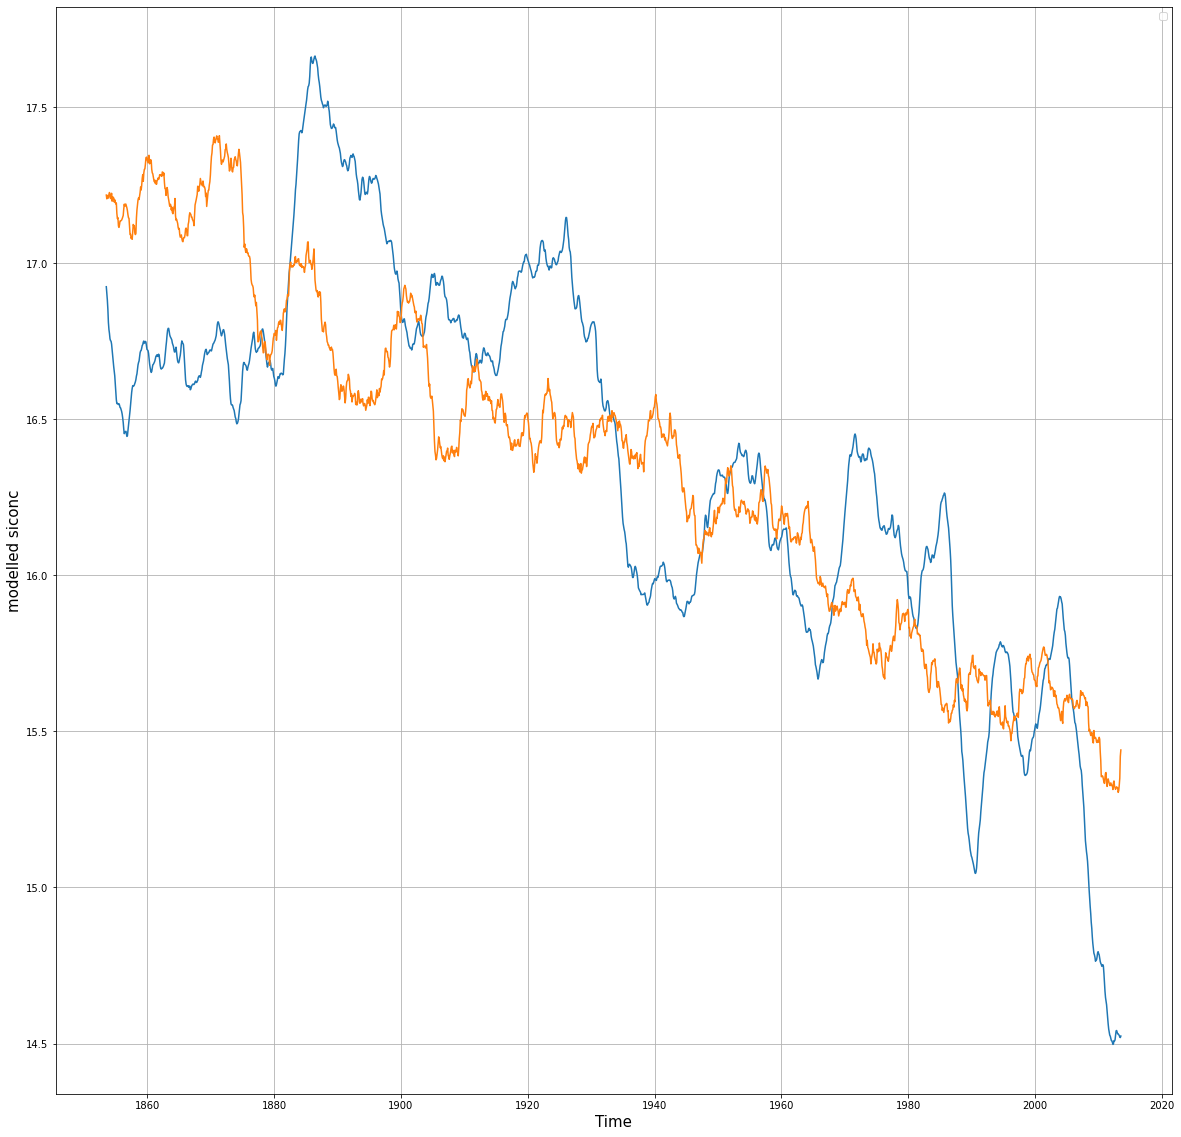

In [ ]:
# 3: get predicted values for y, as before
y_hat = model.predict(X1)

# 4: plot the real and modelled values
plt.figure()
plot_ts(time,y.rolling(time=60, center=True).mean(),'-','siconc')
plot_ts(time,pd.DataFrame(data ={'col2': y_hat}).rolling(60, center=True).mean(),'-','modelled siconc')
plt.legend()
plt.grid()

print('Model score: {}'.format(model.score(X1,y)))

The model score is a little bit inferior but the model is no longer symetric and, perhaps, it could generates better predictions.

In [ ]:
timep = [round(2014*365.25+ i*365.25/12) for i in range(1032)]
X1p = transpose([timep, sisnmassp, sitemptopp, siup, sivp])

print('The shape of X is {}'.format(X1p.shape))
print('The shape of y is {}'.format(yp.shape))

The shape of X is (1032, 5)
The shape of y is (1032,)


No handles with labels found to put in legend.


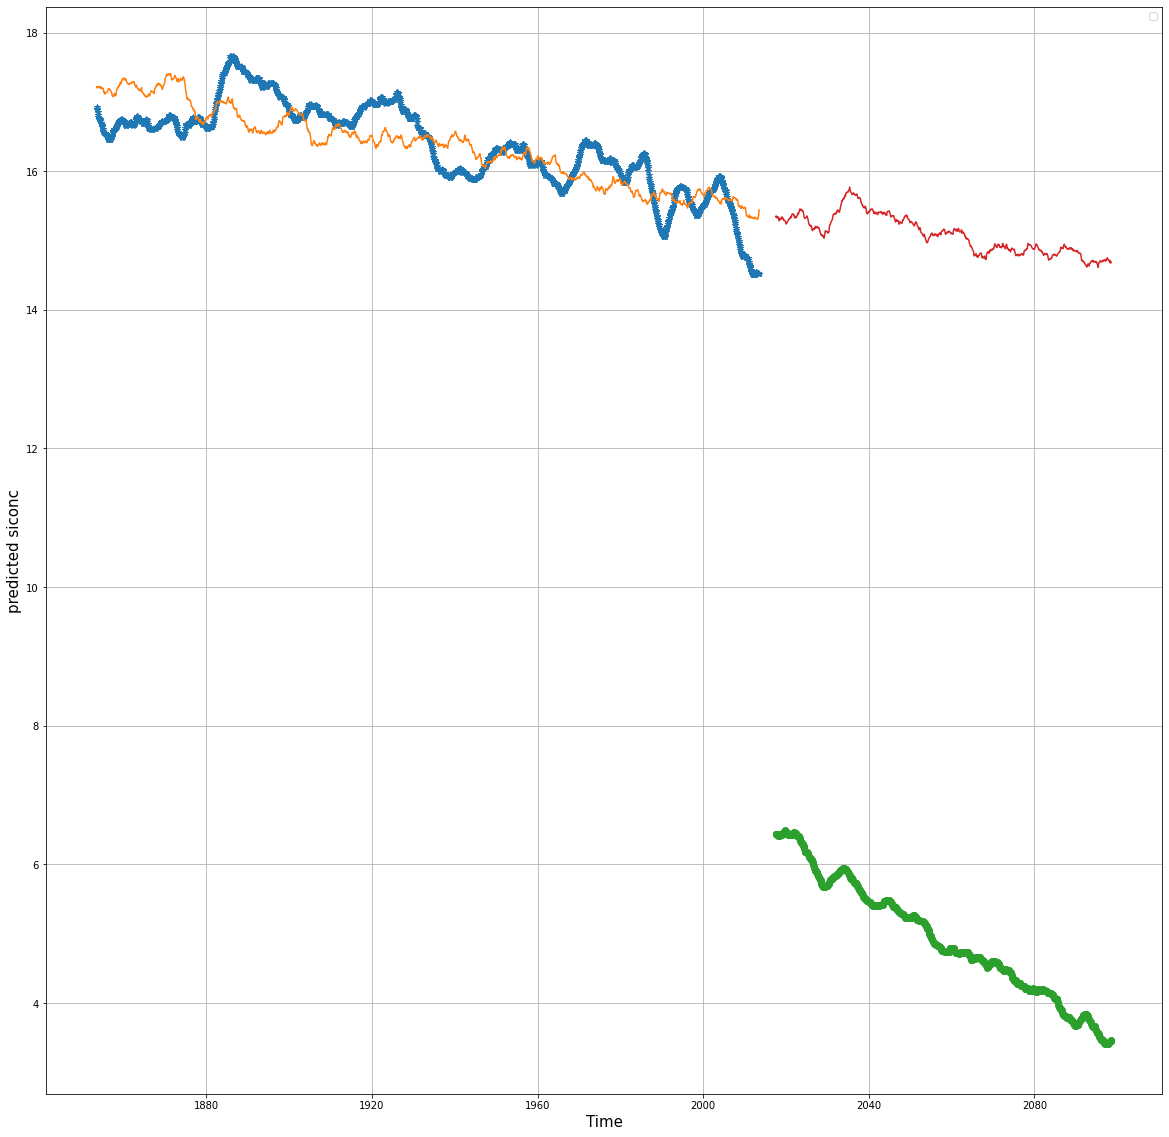

In [ ]:
#3: get predicted values for y, as before
y_hatp = model.predict(X1p)

# 4: plot the real and modelled values
plt.figure()
plot_ts(time,y.rolling(time=60, center=True).mean(),'*', 'past siconc')
plot_ts(time,pd.DataFrame(data ={'col2': y_hat}).rolling(60, center=True).mean(),'-', 'modelled siconc')
plot_ts(timep,yp.rolling(time=60, center=True).mean(),'o', 'future siconc (ssp119)')
plot_ts(timep,pd.DataFrame(data ={'col2': y_hatp}).rolling(60, center=True).mean(), '-', 'predicted siconc')
plt.legend()
plt.grid()

It seems to be an error for the ssp245 predictions of siconc that is not continuous. We will apply a translation to fix that.

No handles with labels found to put in legend.


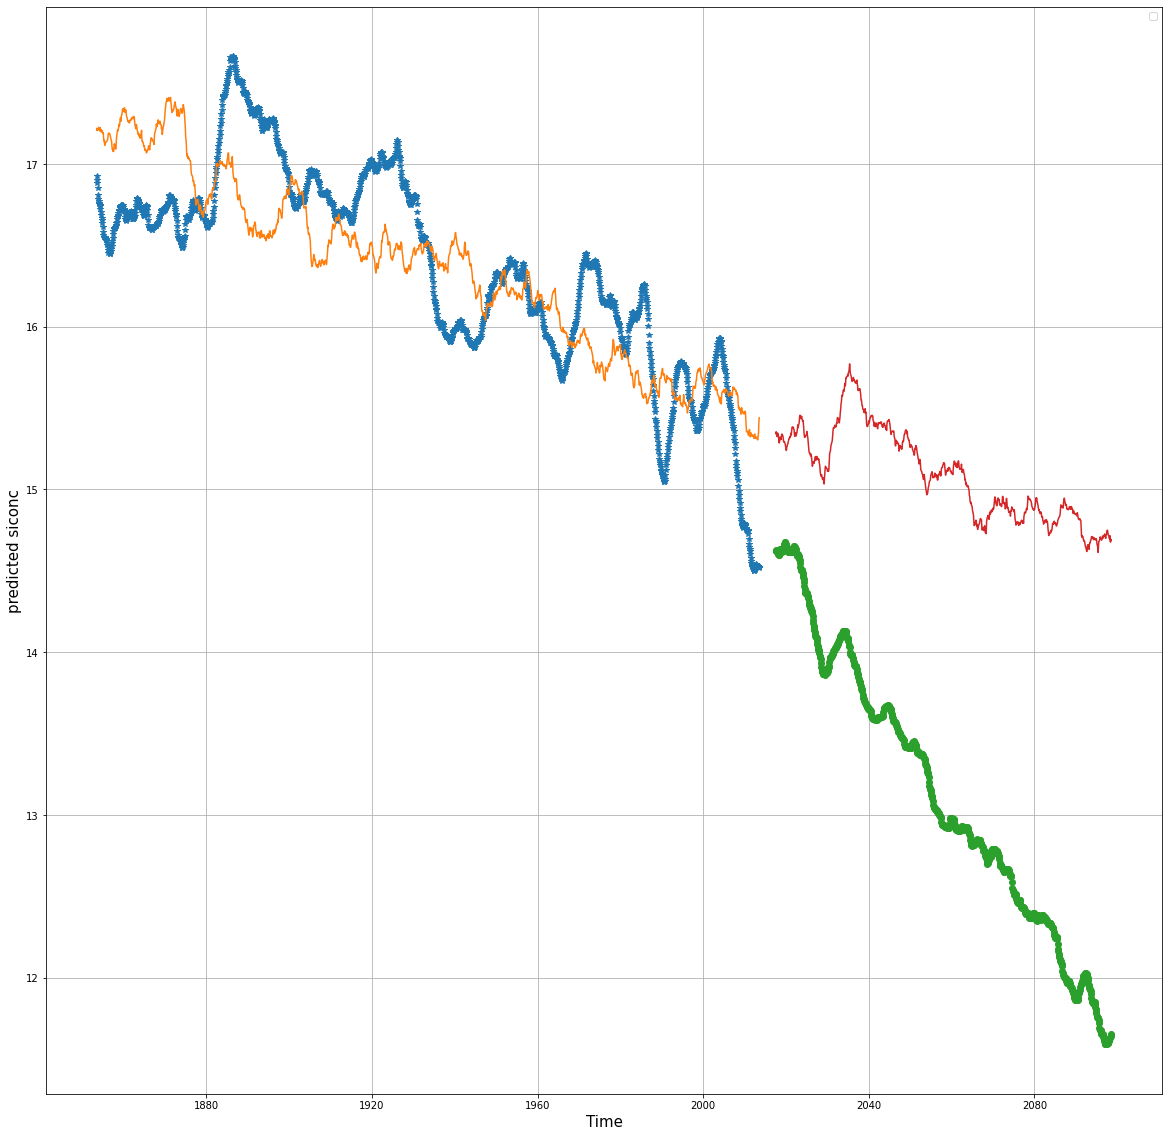

In [ ]:
# 4: plot the real and modelled values
plt.figure()
plot_ts(time,y.rolling(time=60, center=True).mean(),'*', 'past siconc')
plot_ts(time,pd.DataFrame(data ={'col2': y_hat}).rolling(60, center=True).mean(),'-', 'modelled siconc')
plot_ts(timep,yp.rolling(time=60, center=True).mean()+y[-1]-yp[0]+1.7,'o', 'future siconc (ssp119)')
plot_ts(timep,pd.DataFrame(data ={'col2': y_hatp}).rolling(60, center=True).mean(), '-', 'predicted siconc')
plt.legend()
plt.grid()

In [ ]:
yssp245 = array(yp+y[-1]-yp[0]+1.7)
ymp = array(y_hatp)

mean_squared_error(yssp245, ymp)

13.974791893473883


## Model2
Linear Regression with time, snow mass, ice-ocean temperature, ice velocity and co2 mass.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# and load in the SICONC data
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df_siconc = df.query(" table_id == 'SImon' & variable_id == 'siconc' & experiment_id == 'historical' & member_id == 'r1i1p1f1' & institution_id == 'IPSL'")
df_siconc

# setup the gcs access
gcs = gcsfs.GCSFileSystem(token='anon')

# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_siconc.zstore.values[-1]

# create a mapping interface to the store
mapper = gcs.get_mapper(zstore)

# open it using xarray and zarr
ds = xr.open_zarr(mapper, consolidated=True)

time = [round(1850*365.25+ i*365.25/12) for i in range(len(ds.time))]

#sin = [np.sin((2*np.pi*i)/365) for i in time]
#cos = [np.cos((2*np.pi*i)/365) for i in time]

X1 = transpose([time, sisnmass, sitemptop, siu, siv, co2mass])
#X2 = transpose([time, sin, cos, sisnmass, sitemptop, six, siy])
y = ds.siconc.mean(['x', 'y'])

print('The shape of X is {}'.format(X1.shape))
print('The shape of y is {}'.format(y.shape))

The shape of X is (1980, 6)
The shape of y is (1980,)


In [ ]:
# 1: create the model, as before
model = LinearRegression()

# 2: fit the model, as before
model.fit(X1,y)

print('Model coefficients for [a1, a2, a3]: {}'.format(model.coef_))
print('Model coefficient for b: {}'.format(model.intercept_))

Model coefficients for [a1, a2, a3]: [-5.66686655e-06  3.20066504e-01  1.63276738e+00  4.08162127e-03
  5.04558837e-03 -2.16493490e-15]
Model coefficient for b: -418.16873806486177


No handles with labels found to put in legend.


Model score: 0.6163306249377904


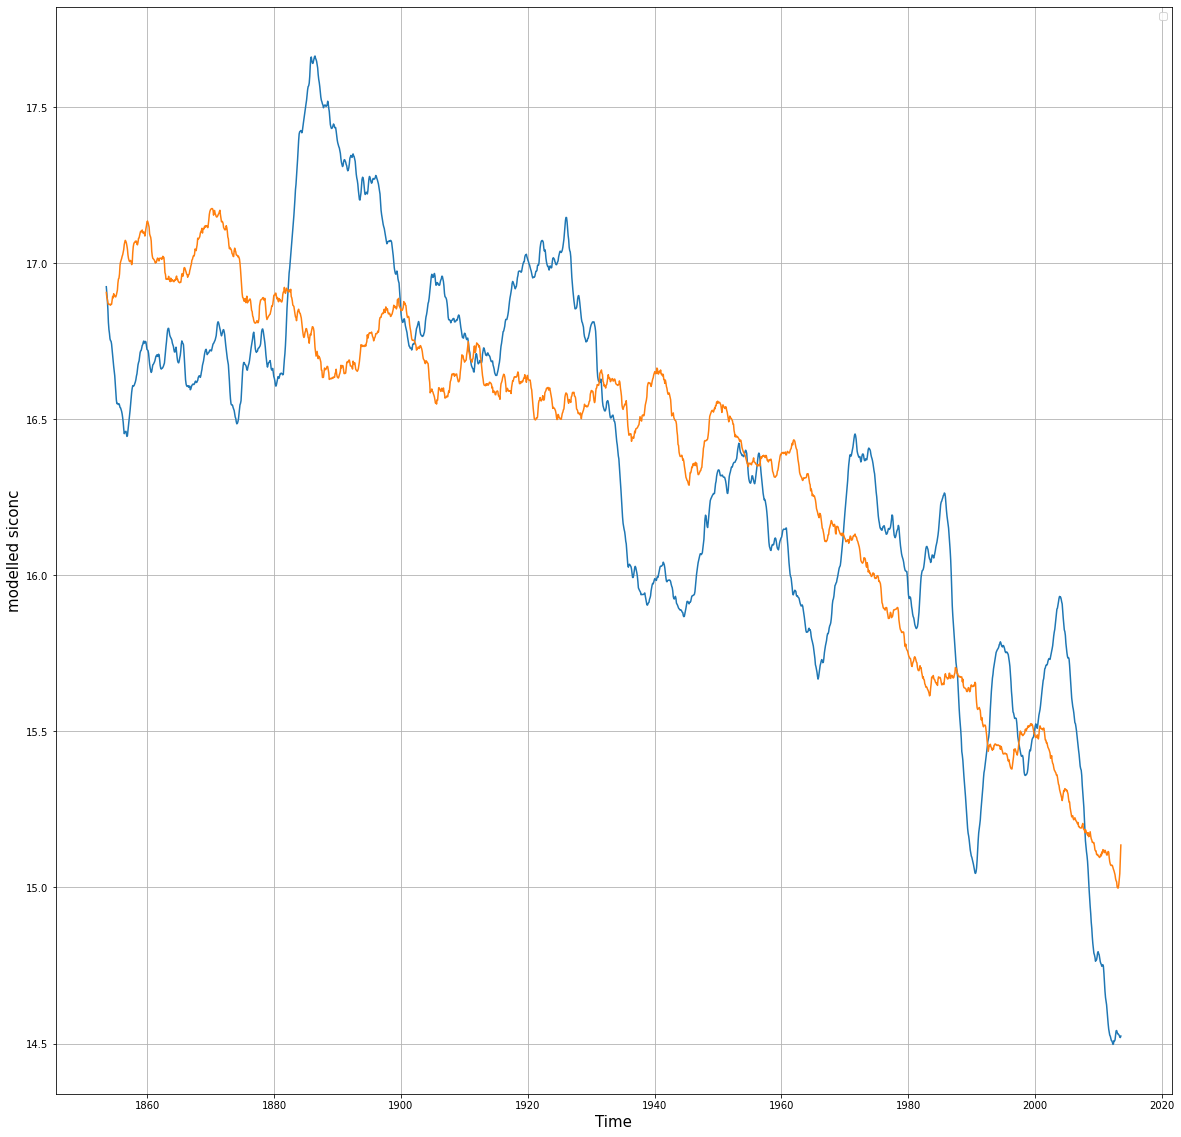

In [ ]:
# 3: get predicted values for y, as before
y_hat = model.predict(X1)

# 4: plot the real and modelled values
plt.figure()
plot_ts(time,y.rolling(time=60, center=True).mean(),'-','siconc')
plot_ts(time,pd.DataFrame(data ={'col2': y_hat}).rolling(60, center=True).mean(),'-','modelled siconc')
plt.legend()
plt.grid()

print('Model score: {}'.format(model.score(X1,y)))

The increase of the number of parameters has damaged the model score (0.6163) but, perhaps, it could generates better predictions.

In [ ]:
timep = [round(2014*365.25+ i*365.25/12) for i in range(1032)]
X1p = transpose([timep, sisnmassp, sitemptopp, siup, sivp, co2massp])

print('The shape of X is {}'.format(X1p.shape))
print('The shape of y is {}'.format(yp.shape))

The shape of X is (1032, 6)
The shape of y is (1032,)


No handles with labels found to put in legend.


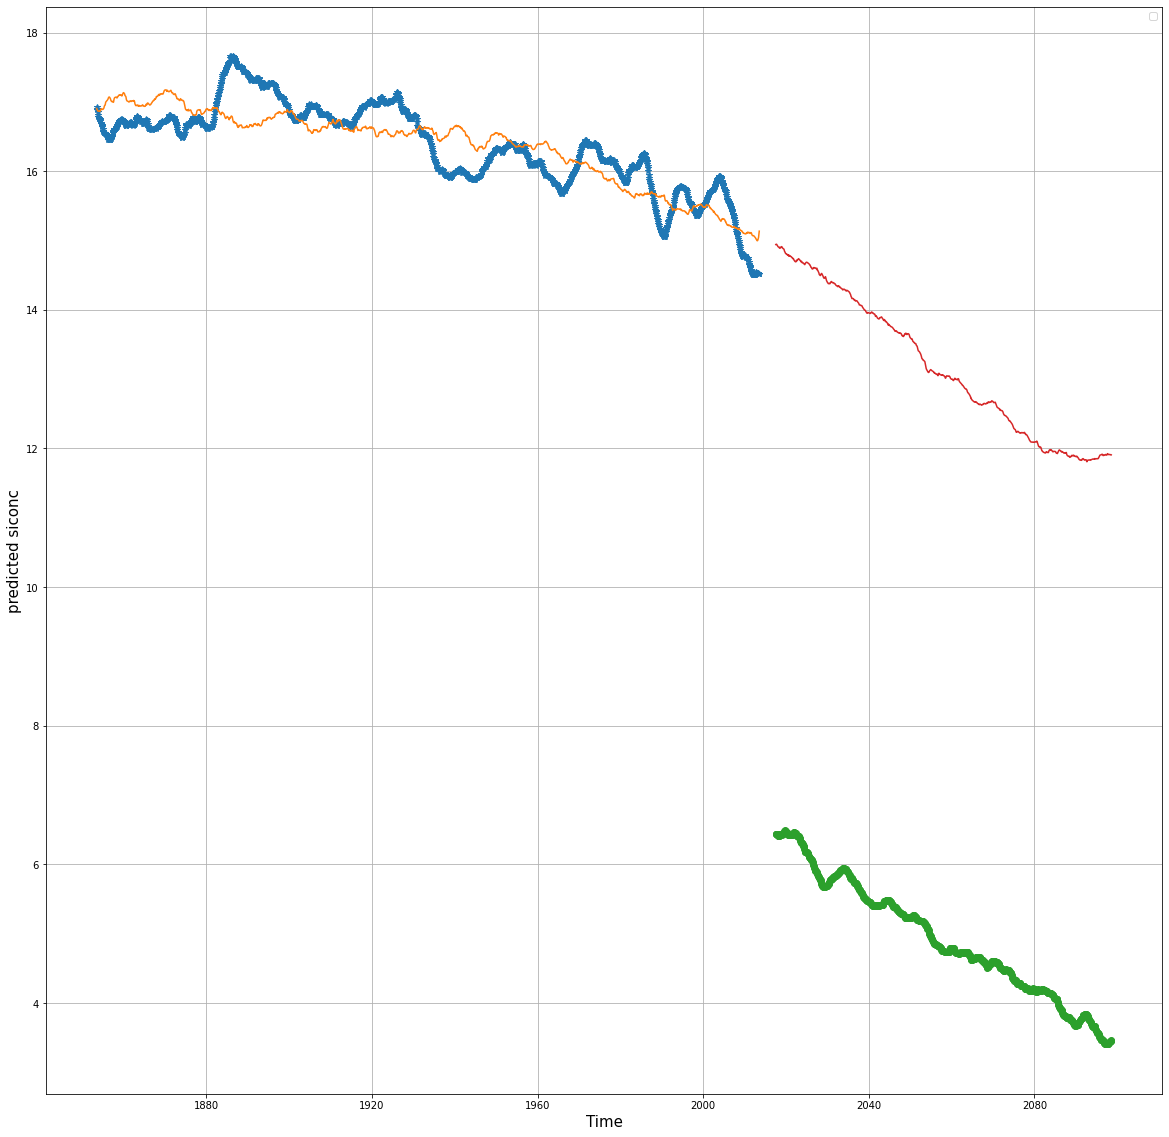

In [ ]:
#3: get predicted values for y, as before
y_hatp = model.predict(X1p)

# 4: plot the real and modelled values
plt.figure()
plot_ts(time,y.rolling(time=60, center=True).mean(),'*', 'past siconc')
plot_ts(time,pd.DataFrame(data ={'col2': y_hat}).rolling(60, center=True).mean(),'-', 'modelled siconc')
plot_ts(timep,yp.rolling(time=60, center=True).mean(),'o', 'future siconc (ssp119)')
plot_ts(timep,pd.DataFrame(data ={'col2': y_hatp}).rolling(60, center=True).mean(), '-', 'predicted siconc')
plt.legend()
plt.grid()

It seems to be an error for the ssp245 predictions of siconc that is not continuous. We will apply a translation to fix that.

No handles with labels found to put in legend.


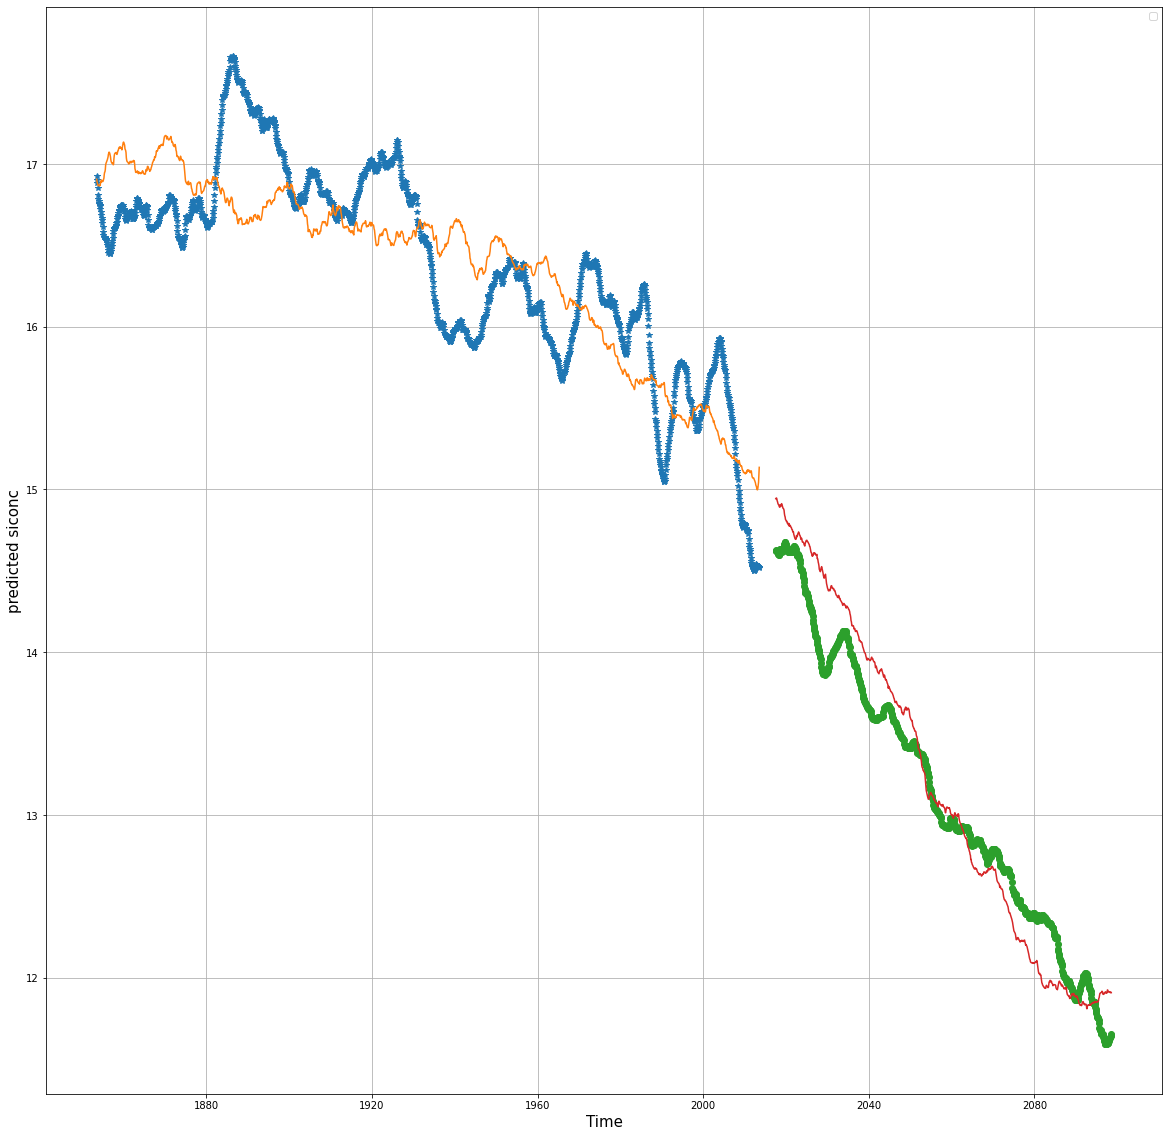

In [ ]:
# 4: plot the real and modelled values
plt.figure()
plot_ts(time,y.rolling(time=60, center=True).mean(),'*', 'past siconc')
plot_ts(time,pd.DataFrame(data ={'col2': y_hat}).rolling(60, center=True).mean(),'-', 'modelled siconc')
plot_ts(timep,yp.rolling(time=60, center=True).mean()+y[-1]-yp[0]+1.7,'o', 'future siconc (ssp119)')
plot_ts(timep,pd.DataFrame(data ={'col2': y_hatp}).rolling(60, center=True).mean(), '-', 'predicted siconc')
plt.legend()
plt.grid()

In [ ]:
yssp245 = array(yp+y[-1]-yp[0]+1.7)
ymp = array(y_hatp)

mean_squared_error(yssp245, ymp)

6.23178186329229

With the translation, the result is pretty good.

#AR2

To modelize the prediction error, we will use an auto-regressive model with two times.

In [ ]:
from sklearn.linear_model import LinearRegression

eps = abs(array(y_hat-y))

eps1 = [0]
eps2 = [0]
for i in range(1979):
  eps1.append(eps[i])
  eps2.append(eps1[i])

model = LinearRegression()

X = transpose([eps1, eps2])

print('The shape of X is {}'.format(X.shape))
print('The shape of y is {}'.format(eps.shape))

model.fit(X, eps)
coef = model.coef_
print(model.coef_)

z = model.predict(X)-eps
print(z.mean(), z.std())

zstd = z.std()

err = [rand()*zstd]
err.append(err[0]*coef[0] + rand()*zstd)

for k in range(1,1031):
  err.append(err[-1]*coef[0]**2 + err[-2]*coef[1]**2 + rand()*zstd)


The shape of X is (1980, 2)
The shape of y is (1980,)
[ 0.55820796 -0.32633376]
3.0592812234115424e-16 0.9105652307962593


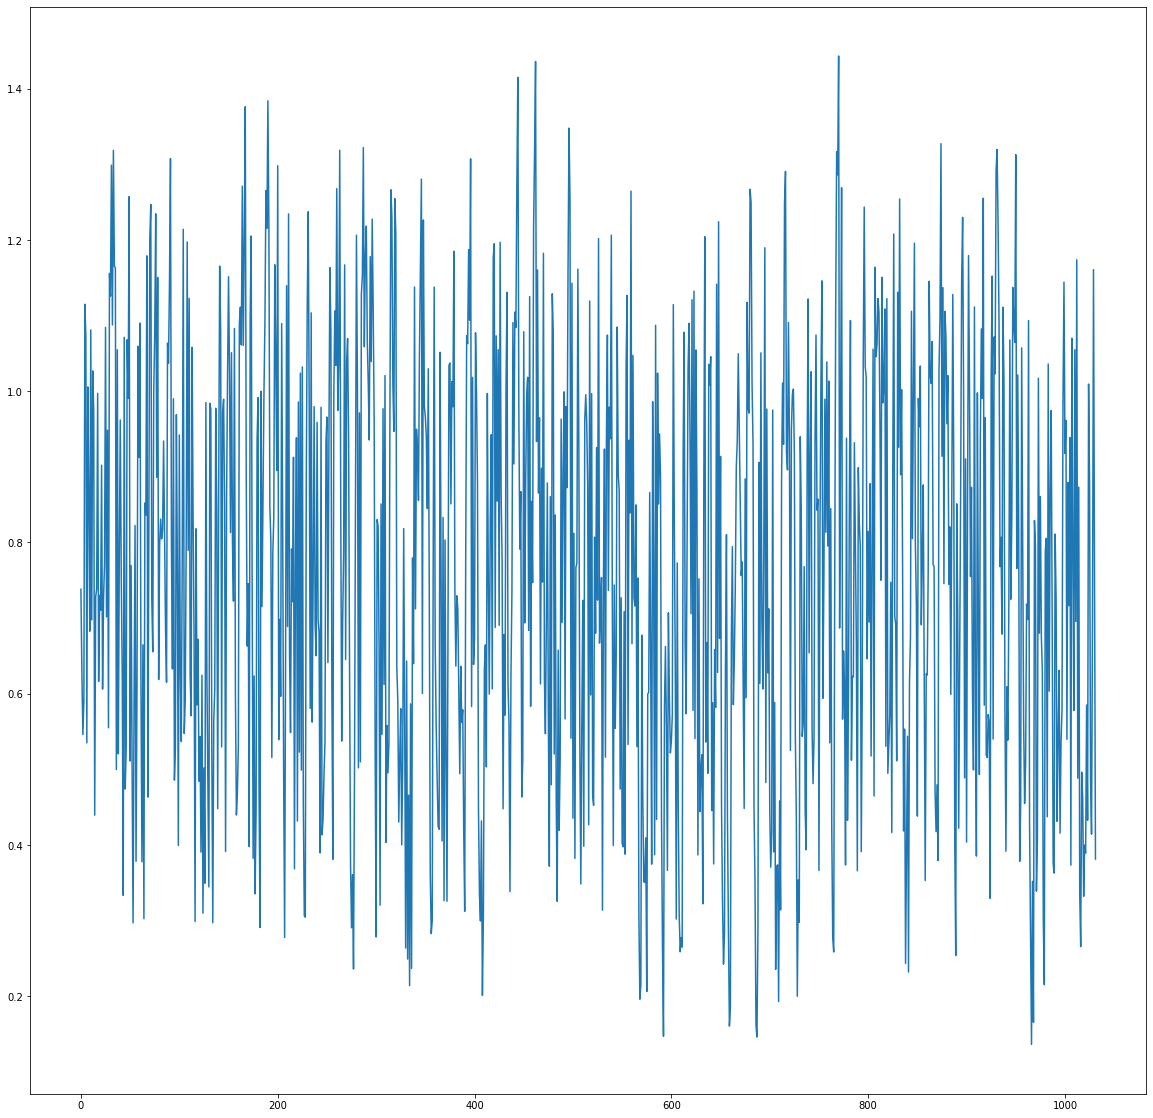

In [ ]:
plot(err)

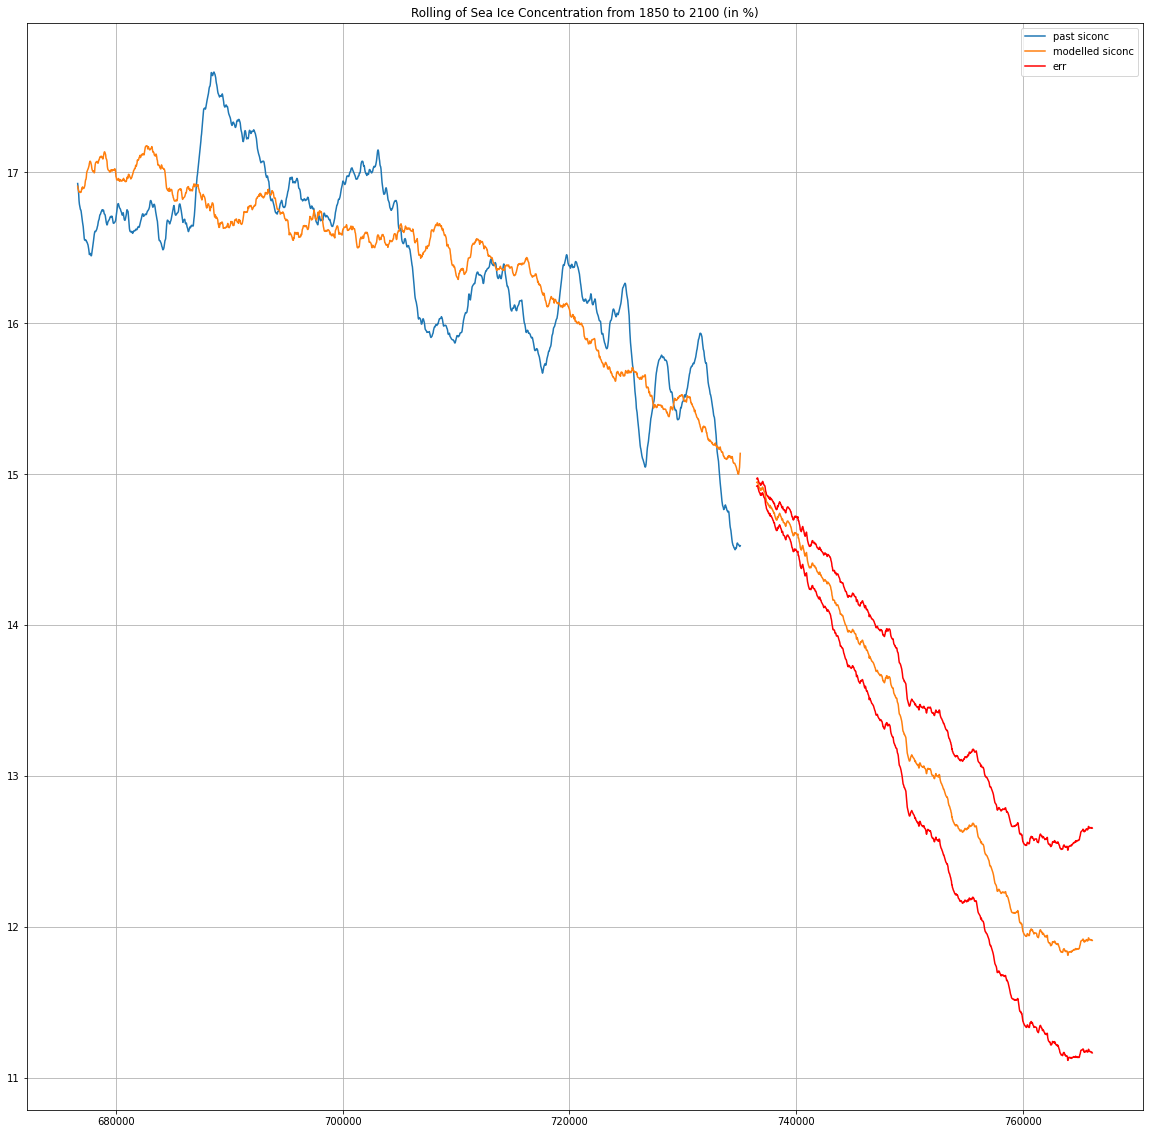

In [ ]:
# 4: plot the real and modelled values
plt.figure()
plt.plot(time,y.rolling(time=60, center=True).mean(), label='past siconc')
plt.plot(time,pd.DataFrame(data ={'col2': y_hat}).rolling(60, center=True).mean(),'tab:orange', label='modelled siconc')
plt.plot(timep,pd.DataFrame(data ={'col2': y_hatp}).rolling(60, center=True).mean(), 'tab:orange')
plt.plot(timep,pd.DataFrame(data ={'col2': y_hatp+cumsum(err)/1032}).rolling(60, center=True).mean(), 'r', label ='err')
plt.plot(timep,pd.DataFrame(data ={'col2': y_hatp-cumsum(err)/1032}).rolling(60, center=True).mean(), 'r')
plt.title('Rolling of Sea Ice Concentration from 1850 to 2100 (in %)')
plt.legend()
plt.grid()

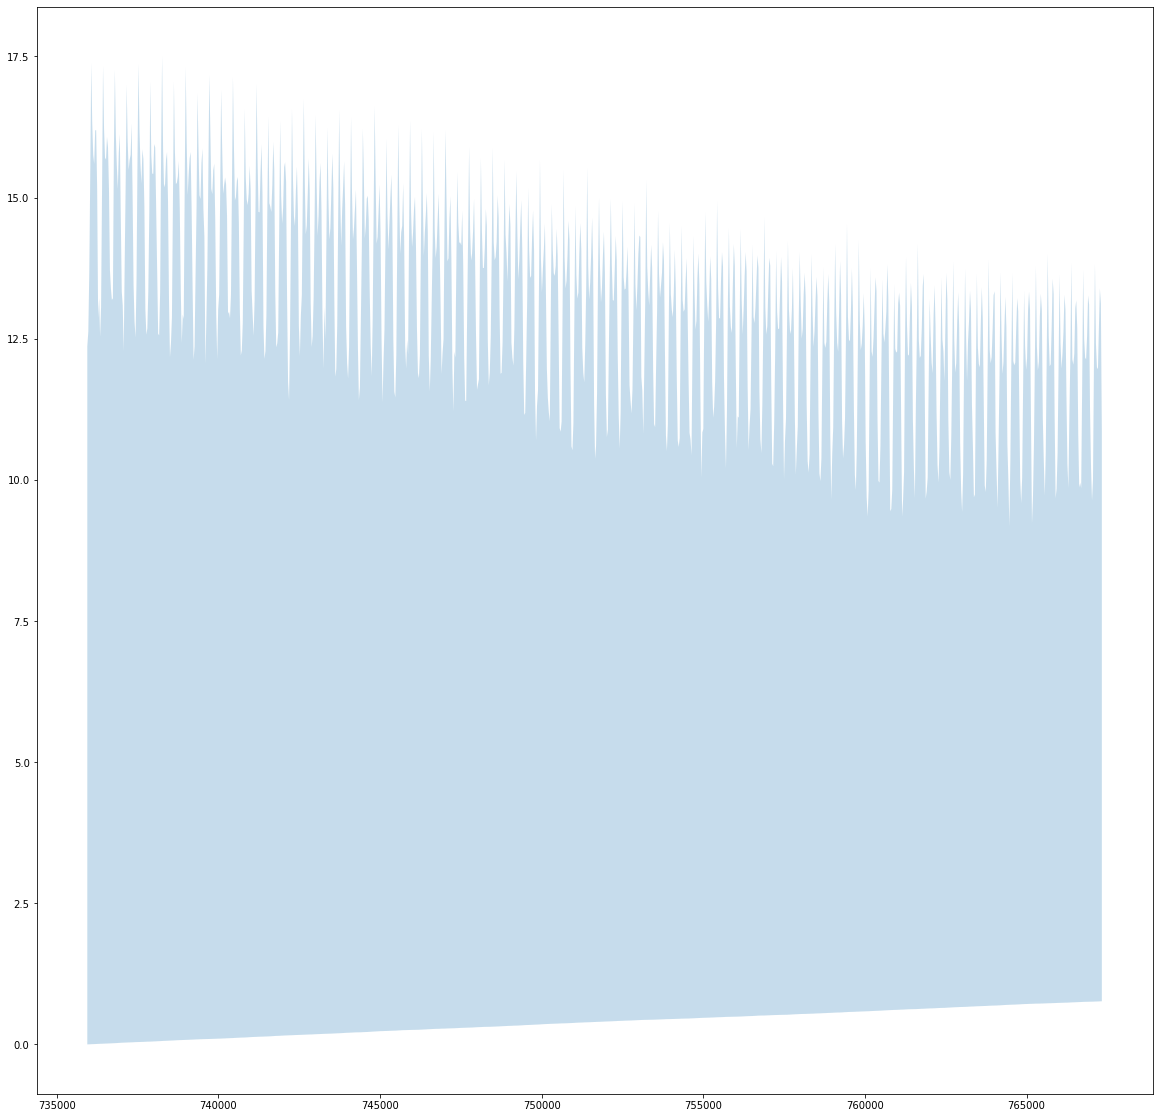

In [ ]:
plt.fill_between(timec, y_hatp, cumsum(err)/1032, alpha=0.25)

To better the model it should be interesting add, but above all choose, variables that influence a lot the Sea Ice Concentration. I guess it could be surface temparture, water temperature, ... <br>It is important to be aware and don't take too many variables. I think a good model for the Sea Ice prediction must consider three types of varibales:

*   Time, meteological cycles, ...
*   Negative parameters: co2mass, surface temperature, water temperature (in the sense that they increase and damaged the ice floe), ...
*   Positive parameters (that could create or increase ice floe): sisnmass (snow that increase thickness), ...



https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3 for a more complex model 

# SVM Regression with seasonal parameters 

Regression with SVM and time sinus and cosinus wit differents periods.



In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# and load in the SICONC data
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df_siconc = df.query(" table_id == 'SImon' & variable_id == 'siconc' & experiment_id == 'historical' & member_id == 'r1i1p1f1' & institution_id == 'IPSL'")
df_siconc

# setup the gcs access
gcs = gcsfs.GCSFileSystem(token='anon')

# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_siconc.zstore.values[-1]

# create a mapping interface to the store
mapper = gcs.get_mapper(zstore)

# open it using xarray and zarr
ds = xr.open_zarr(mapper, consolidated=True)
ds

time = [round(1850*365.25+ i*365.25/12) for i in range(len(ds.time))]

sin = [np.sin((2*np.pi*i)/365) for i in time]
cos = [np.cos((2*np.pi*i)/365) for i in time]
cosm = [np.cos((2*np.pi*i)/(24*365)) for i in time]
sinm = [np.sin((2*np.pi*i)/(24*365)) for i in time]
coss = [np.cos((2*np.pi*i)/(24*60*365)) for i in time]
sins = [np.sin((2*np.pi*i)/(24*60*365)) for i in time]

X3 = transpose([time, cos, sin, cosm, coss, sinm, sins])
#X2 = transpose([time, sin, cos, sisnmass, sitemptop, six, siy])
y = ds.siconc.mean(['x', 'y'])

print('The shape of X is {}'.format(X3.shape))
print('The shape of y is {}'.format(y.shape))

The shape of X is (1980, 7)
The shape of y is (1980,)


In [ ]:
# 1: create the model, as before
model = make_pipeline(StandardScaler(), SVR(C=100, epsilon=0.1)) # C=1, 10, 100

# 2: fit the model, as before
model.fit(X3,y)

No handles with labels found to put in legend.


Model score: 0.9820066018141241


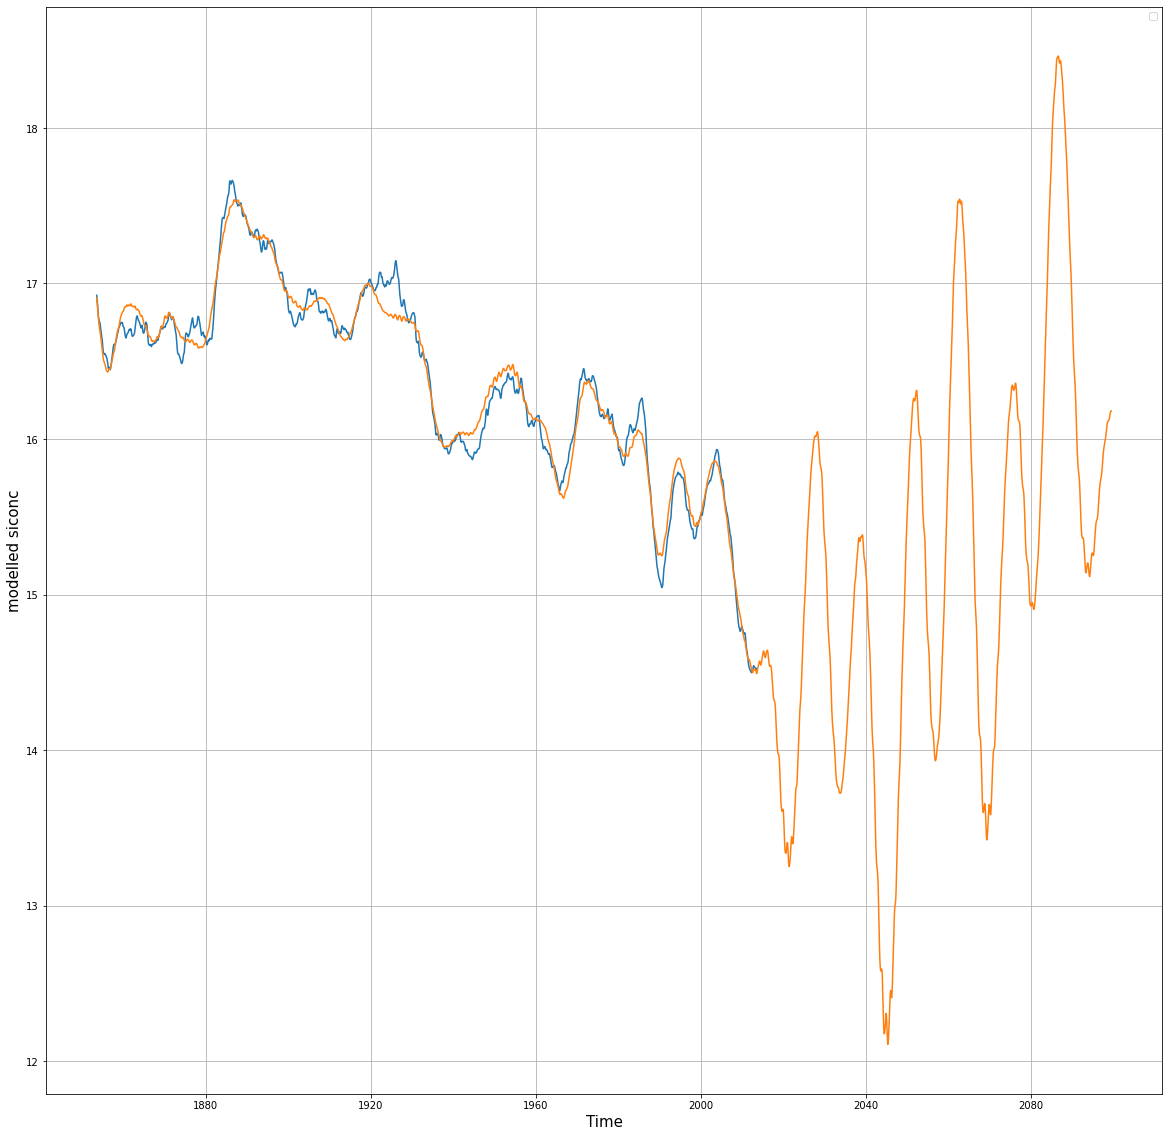

In [ ]:
timep = [round(1850*365.25+ i*365.25/12) for i in range(1980+1032)]

sinp = [np.sin((2*np.pi*i)/365) for i in timep]
cosp = [np.cos((2*np.pi*i)/365) for i in timep]
cosmp = [np.cos((2*np.pi*i)/(24*365)) for i in timep]
sinmp = [np.sin((2*np.pi*i)/(24*365)) for i in timep]
cossp = [np.cos((2*np.pi*i)/(24*60*365)) for i in timep]
sinsp = [np.sin((2*np.pi*i)/(24*60*365)) for i in timep]

Xp = transpose([timep, cosp, sinp, cosmp, cossp, sinmp, sinsp])

# 3: get predicted values for y, as before
y_hat = model.predict(Xp)

# 4: plot the real and modelled values
plt.figure()
plot_ts(time,y.rolling(time=60, center=True).mean(),'-','siconc')
plot_ts(timep,pd.DataFrame(data ={'col2': y_hat}).rolling(60, center=True).mean(),'-','modelled siconc')
plt.legend()
plt.grid()

print('Model score: {}'.format(model.score(Xp[:1980],y)))

#First Data about Sithick

Then , we get the data from the sithick data, still from the ssp585 scenario. 

In [ ]:
# and load in the Sthickness data
df2 = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df2_sthickness = df.query("activity_id=='ScenarioMIP' & table_id == 'SImon' & variable_id == 'sithick' & experiment_id == 'ssp585' & institution_id == 'IPSL'")

# setup the gcs access
gcs_2 = gcsfs.GCSFileSystem(token='anon')

# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df2_sthickness.zstore.values[-1]

# create a mapping interface to the store
mapper = gcs_2.get_mapper(zstore)

# open it using xarray and zarr
ds2 = xr.open_zarr(mapper, consolidated=True)
ds2

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<xarray.Dataset>
Dimensions:         (axis_nbounds: 2, nvertex: 4, time: 1032, x: 362, y: 332)
Coordinates:
    bounds_nav_lat  (y, x, nvertex) float32 dask.array<chunksize=(332, 362, 4), meta=np.ndarray>
    bounds_nav_lon  (y, x, nvertex) float32 dask.array<chunksize=(332, 362, 4), meta=np.ndarray>
    nav_lat         (y, x) float32 dask.array<chunksize=(332, 362), meta=np.ndarray>
    nav_lon         (y, x) float32 dask.array<chunksize=(332, 362), meta=np.ndarray>
  * time            (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
    time_bounds     (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1032, 2), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds, nvertex, x, y
Data variables:
    area            (y, x) float32 dask.array<chunksize=(332, 362), meta=np.ndarray>
    sithick         (time, y, x) float32 dask.array<chunksize=(516, 332, 362), meta=np.ndarray>
Attributes:
    CMIP6_CV_version:       cv=6.2.15.1
    Conventions:            CF-1.7 CMIP-6.2
    EXPID:                  ssp585
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  60265.0
    contact:                ipsl-cmip6@listes.ipsl.fr
    creation_date:          2019-10-22T10:17:17Z
    data_specs_version:     01.00.28
    description:            Future scenario with high radiative forcing by th...
    dr2xml_md5sum:          b6f602401512e82e2d7cadc2c6f36c2a
    dr2xml_version:         1.16
    experiment:             update of RCP8.5 based on SSP5
    experiment_id:          ssp585
    external_variables:     areacello
    forcing_index:          1
    frequency:              mon
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL-CM...
    grid:                   native ocean tri-polar grid with 105 k ocean cells
    grid_label:             gn
    history:                none
    initialization_index:   1
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    institution_id:         IPSL
    license:                CMIP6 model data produced by IPSL is licensed und...
    mip_era:                CMIP6
    model_version:          6.1.10
    name:                   /ccc/work/cont003/gencmip6/lurtont/IGCM_OUT/IPSLC...
    nominal_resolution:     100 km
    parent_activity_id:     CMIP
    parent_experiment_id:   historical
    parent_mip_era:         CMIP6
    parent_source_id:       IPSL-CM6A-LR
    parent_time_units:      days since 1850-01-01 00:00:00
    parent_variant_label:   r6i1p1f1
    physics_index:          1
    product:                model-output
    realization_index:      6
    realm:                  seaIce ocean
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    source_id:              IPSL-CM6A-LR
    source_type:            AOGCM BGC
    status:                 2020-02-09;created; by gcs.cmip6.ldeo@gmail.com
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               SImon
    title:                  IPSL-CM6A-LR model output prepared for CMIP6 / Sc...
    tracking_id:            hdl:21.14100/41ecbd15-a0f6-440a-87d3-d455045db85b
    variable_id:            sithick
    variant_info:           Each member starts from the corresponding member ...
    variant_label:          r6i1p1f1

In [ ]:
ds2=ds2.sel(y=slice(220,350))

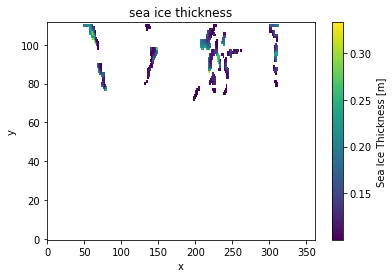

In [ ]:
#try to plot it for a specific map 
plt.figure()
ds2.sithick.sel(time='2100-01').squeeze().plot()
plt.title('sea ice thickness')
plt.show()

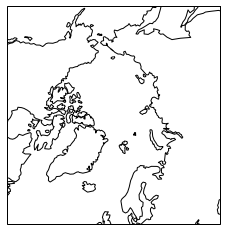

In [ ]:
fig = plt.figure()
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.set_extent([-180, 180, 55, 90], ccrs.PlateCarree())
ax.coastlines()

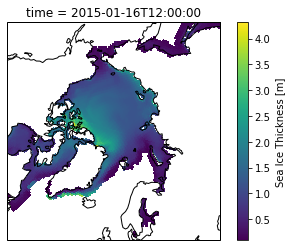

In [ ]:
# first we set up our axes with the projection that we want
ax = plt.axes(projection=ccrs.NorthPolarStereo());
# then we set the latitude limits on our figure (here, we include all longitudes
# (-180° -> 180°) and 55°N -> 90°N)
ax.set_extent([-180, 180, 55, 90], ccrs.PlateCarree())
# now we tell xarray to plot our data. We pass a number of extra parameters:
# transform=ccrs.PlateCarree() -> tells xarray how to transform the data
# x='nav_lon' -> tells xarray the name of the longitude variable
# y='nav_lat' -> tells xarray the name of the latitude variable
ds2.sithick[0].plot.pcolormesh(ax=ax,transform=ccrs.PlateCarree(),x='nav_lon', y='nav_lat', add_colorbar=True); 
# finally, we add the coastlines
ax.coastlines();

# Volume Calcul



In [ ]:
#multiply to get the volume 

volume=ds.siconc.values*ds2.sithick.values 
0001-01-01

In [ ]:
# first we set up our axes with the projection that we want
ax = plt.axes(projection=ccrs.NorthPolarStereo());
# then we set the latitude limits on our figure (here, we include all longitudes
# (-180° -> 180°) and 55°N -> 90°N)cenarioMIP ))
# now we tell xarray to plot our data. We pass a number of extra parameters:
# transform=ccrs.PlateCarree() -> tells xarray how to transform the data
# x='nav_lon' -> tells xarray the name of the longitude variable
# y='nav_lat' -> tells xarray the name of the latitude variable
ds.volume[0].plot.pcolormesh(ax=ax,transform=ccrs.PlateCarree(),x='nav_lon', y='nav_lat', add_colorbar=True); 
# finally, we add the coastlines
ax.coastlines();32,

/usr/local/lib/python3.6/dist-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


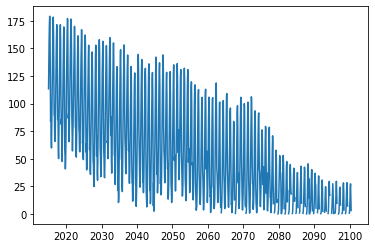

In [ ]:
#plot the data for the regression 
temps = ds.volume['time']
y = ds.volume.mean(dim=('x', 'y')).values

plt.figure()
plt.plot(temps, y)
plt.show()

# Linear Regressin on Sea Ice Volume 

In [ ]:
omega = 1/365.25
0001-01-01df = pd.DataFrame(data=numpy_data, index=["row1", "row2"]
temps2=[]
for i in range(len(ds.volume['time'])):
  temps2.append(np.round((1850*365.25+i*365.25/12)))


x1=np.ones(len(temps2))
x2 = temps2

x3 = []
for i in range(len(temps2)):
  x3.append(np.sin(2*3.14*omega*temps2[i]))

x4 = []
for j in range(len(temps2)):
  x4.append(np.cos(2*np.pi*omega*temps2[j]))

X = np.vstack((x1,x2,x3, x4)).T

m_X=np.nanmean(X)
m_Y=np.nanmean(y)

#we replace the nans values by the mean of the value of te array

X=np.nan_to_num(X, copy=True, nan=m_X, posinf=None, neginf=None)
y=np.nan_to_num(y, copy=True, nan=m_Y, posinf=None, neginf=None)df = pd.DataFrame(data=numpy_data, index=["row1", "row2"]

print(X.shape, y2.shape)


(1032, 4) (1032,)


In [ ]:
from sklearn.linear_model import LinearRegression
df = pd.DataFrame(data=numpy_data, index=["row1", "row2"]
print('The shape of X is {}'.format(X.shape))
print('The shape of Y is {}'.format(y.shape))

# 2: create the model, as before
model = LinearRegression()

# 3: fit the model, as before
model.fit(X,y)

The shape of X is (1032, 4)
The shape of Y is (1032,)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Model coefficients for [a1, a2, a3]: {}'.format(model.coef_))
print('Model coefficient for b: {}'.format(model.intercept_))

Model coefficients for [a1, a2, a3]: [ 0.00000000e+00 -2.90696440e-03  3.66690720e+01 -1.94856366e+01]
Model coefficient for b: 2070.0842570294008


In [ ]:
print(temps.shape, y.shape)

(1032,) (1032,)


0.6923051705352776


<Figure size 432x288 with 0 Axes>

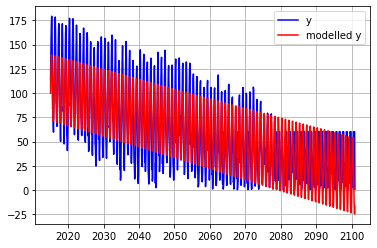

In [ ]:
#4: get predicted values for y, as before
y_hat = model.predict(X)
print(model.score(X,y))


# 5: plot the real and modelled values
plt.figure()
fig, ax = plt.subplots()
plt.plot(temps,y,label='y',c='blue')
plt.plot(temps,y_hat,label='modelled y',c='red')
#ax.set_aspect(4000)
plt.legend()
plt.grid()

#cross validation done by spliting points but not randomly (splitt in two parts betwen training and testing sets)
#easy to extrapolate the model if we want 
#also have a look at your parameter of the statistical model: 
#intercept : not really interesting 
#alpha 1 : tendency, slope of the sea level increase 
#alpha 2 and 3 : seasonal contribution, without both cos and sin not able to grasp the seasonal cycle also  

For the volume, we computed the regression with both the scenarios ssp245 and ssp58. The codes are the same, we change only the query to import the data. 

#Work on Sea Level Pressure 

Now we will get the pressure data to compute the arctic oscillation values, which is defined as the pressure difference between 20 degrees North and the North Pole. This value (positive or negative) gives an information on the wind configuration and could explain the increased or decreased sea ice melting. 

In [ ]:
# and load in the pressure data
df3 = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df3_psl = df.query("activity_id=='ScenarioMIP' & table_id == 'Amon' & variable_id == 'psl' & experiment_id == 'ssp245' & institution_id == 'IPSL'")

# setup the gcs access
gcs_3 = gcsfs.GCSFileSystem(token='anon')

# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df3_psl.zstore.values[-1]

# create a mapping interface to the store
mapper = gcs_3.get_mapper(zstore)

# open it using xarray and zarr
ds3 = xr.open_zarr(mapper, consolidated=True, decode_times=False)
ds3

In [ ]:
pole=ds3.sel(lat=90, method='nearest' ).sel(lon=0, method='nearest')
temp=ds3.sel(lat=20, method='nearest' ).sel(lon=0, method='nearest')

In [ ]:
#display arctic oscillation 
diff=temp.psl.values-pole.psl.values


In [ ]:

temps=np.round(ds3.time.values/365.25/10)
an=1850+temps


In [ ]:
df = pd.DataFrame(data=diff)
df_an=pd.DataFrame(data=an)

In [ ]:
df_ma=df.rolling(30).mean()
df_an_np=df_an.to_numpy()
df_ma_np=df_ma.to_numpy()

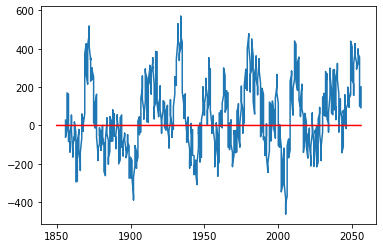

In [ ]:
A=df_an_np.flatten()
B=df_ma_np.flatten()

plt.plot(A, B)

ze = np.zeros((len(an)))
plt.plot(an, ze, c='r')